# Ames Housing Machine Learning: Predicting Home Prices

###  Importing Necessaty Libraries to be Used For EDA and Preprocessing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix

In [24]:
pd.set_option("display.max_columns",999) # to show all the columns in the output 
pd.set_option("display.max_rows",999) # to show all the rows in the output 
plt.rcParams['figure.figsize'] = [8.0, 5.0] # setting plotting settings for the remaining of the notebook
plt.rcParams['figure.dpi'] = 140 #setting pixels

###  Reading the Data

In [25]:
homes=pd.read_csv(r"/Users/tiko/Documents/Machine_Learning_Ames_Housing_Kaggle/Ames_HousePrice.csv")
housing2=pd.read_csv(r"/Users/tiko/Documents/Machine_Learning_Ames_Housing_Kaggle/Ames_Real_Estate_Data.csv")


# ** housing2 dataset is an additional dataset that will be used if it contains usfull information **

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA For First Dataset (Ames_HousePrice.csv) --> homes

In [ ]:
homes.head()
'''

Using different Machine Learning models, we will attempt to predict Sales Price of homes based on data collected
from sales between the years 2007-2010. 


'''

In [ ]:
homes.info()

In [ ]:
homes.describe()

In [ ]:
homes.shape

# 2580 rows and 82 columns

In [ ]:

homes['YrSold'].value_counts().plot.bar();

##Bar plot based on Year Sold

### Exploring Distribution of our Target (SalePrice)

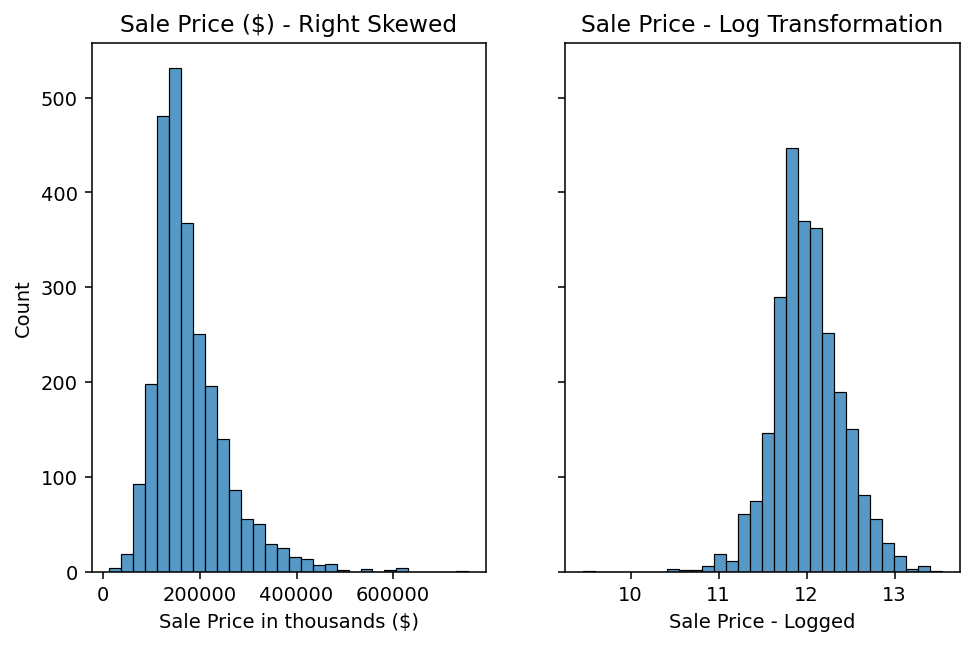

In [26]:
def target_dist():
    '''
    
    Analyzing how our target column (SalePrice) is distributed. For linear models, we need our target variable to 
    follow the gaussian distribution.
    
    '''

    fig, (ax1, ax2) = plt.subplots(1,2, sharex=False, sharey=True)

    sns.histplot(homes['SalePrice'],ax=ax1,bins=30);
    sns.histplot(np.log(homes['SalePrice']),ax=ax2,bins = 30);

    ax1.set_title("Sale Price ($) - Right Skewed")
    ax1.set_ylabel("Count")
    ax1.set_xlabel("Sale Price in thousands ($)")

    ax2.set_title("Sale Price - Log Transformation")
    ax2.set_ylabel("Count")
    ax2.set_xlabel("Sale Price - Logged")
    

target_dist()
#How is our output column distributed (currently skewd to the right -->log transform)

## Exploring Columns and Column Types in our dataset

In [6]:
# Deeper look into type of columns
print("Numeric Columns: ", '\n')
print(homes.select_dtypes(exclude='object').columns, '\n')# all numerical (non-object) columns

print('Object Columns: ','\n')
print(homes.select_dtypes(include='object').columns, '\n')# All object columns (string and/or mixed)


Numeric Columns:  

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object') 

Object Columns:  

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposu

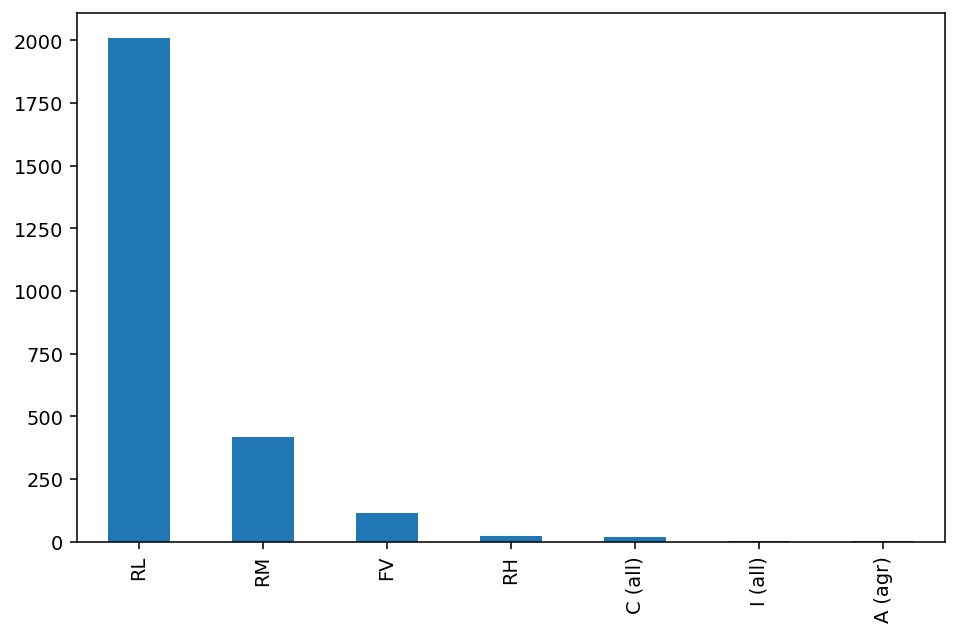

In [7]:

homes['MSZoning'].value_counts().plot.bar();
#Some categorical Columns are imbalanced (will need to combine minority classes)

In [8]:
df_object = homes.select_dtypes(include='object') 
#creating DF with all non-numeric columns (potentially categorical) to check class balance. 
df_numeric = homes.select_dtypes(exclude = 'object')

In [20]:
homes = dataset()

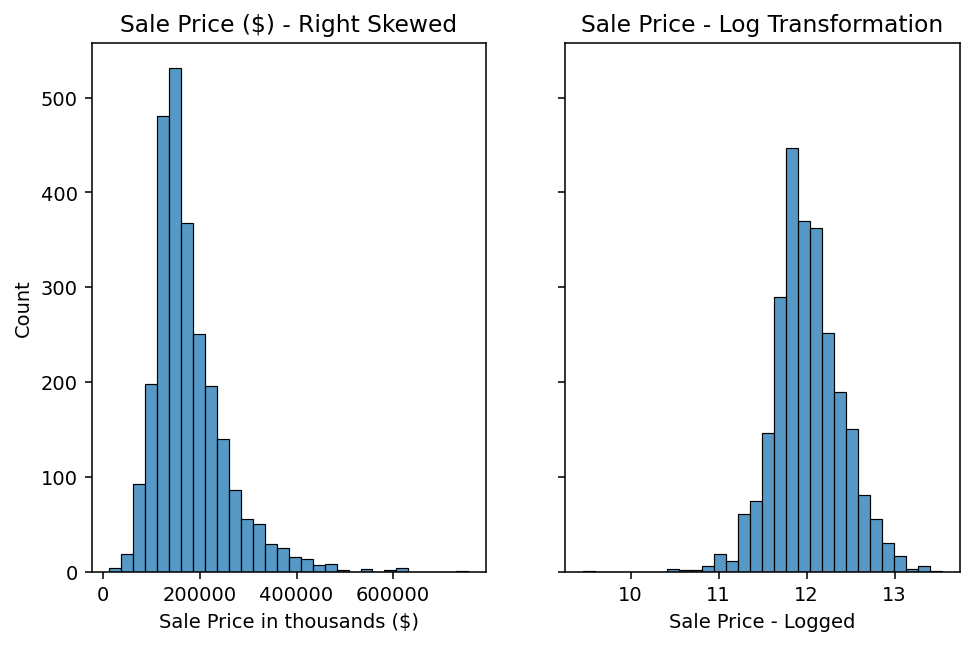

In [21]:
homes.target_dist()

In [22]:
homes.info()

AttributeError: 'dataset' object has no attribute 'info'

'\nBased on the subplots output, we can see that we have many categorical input variables that have imbalanced \nclasses. One way to solve this problem is to combine  minority classes into one. \n\nThis is tricky as we also do not want to lose additional information detrimental to our output. \n\n\n'

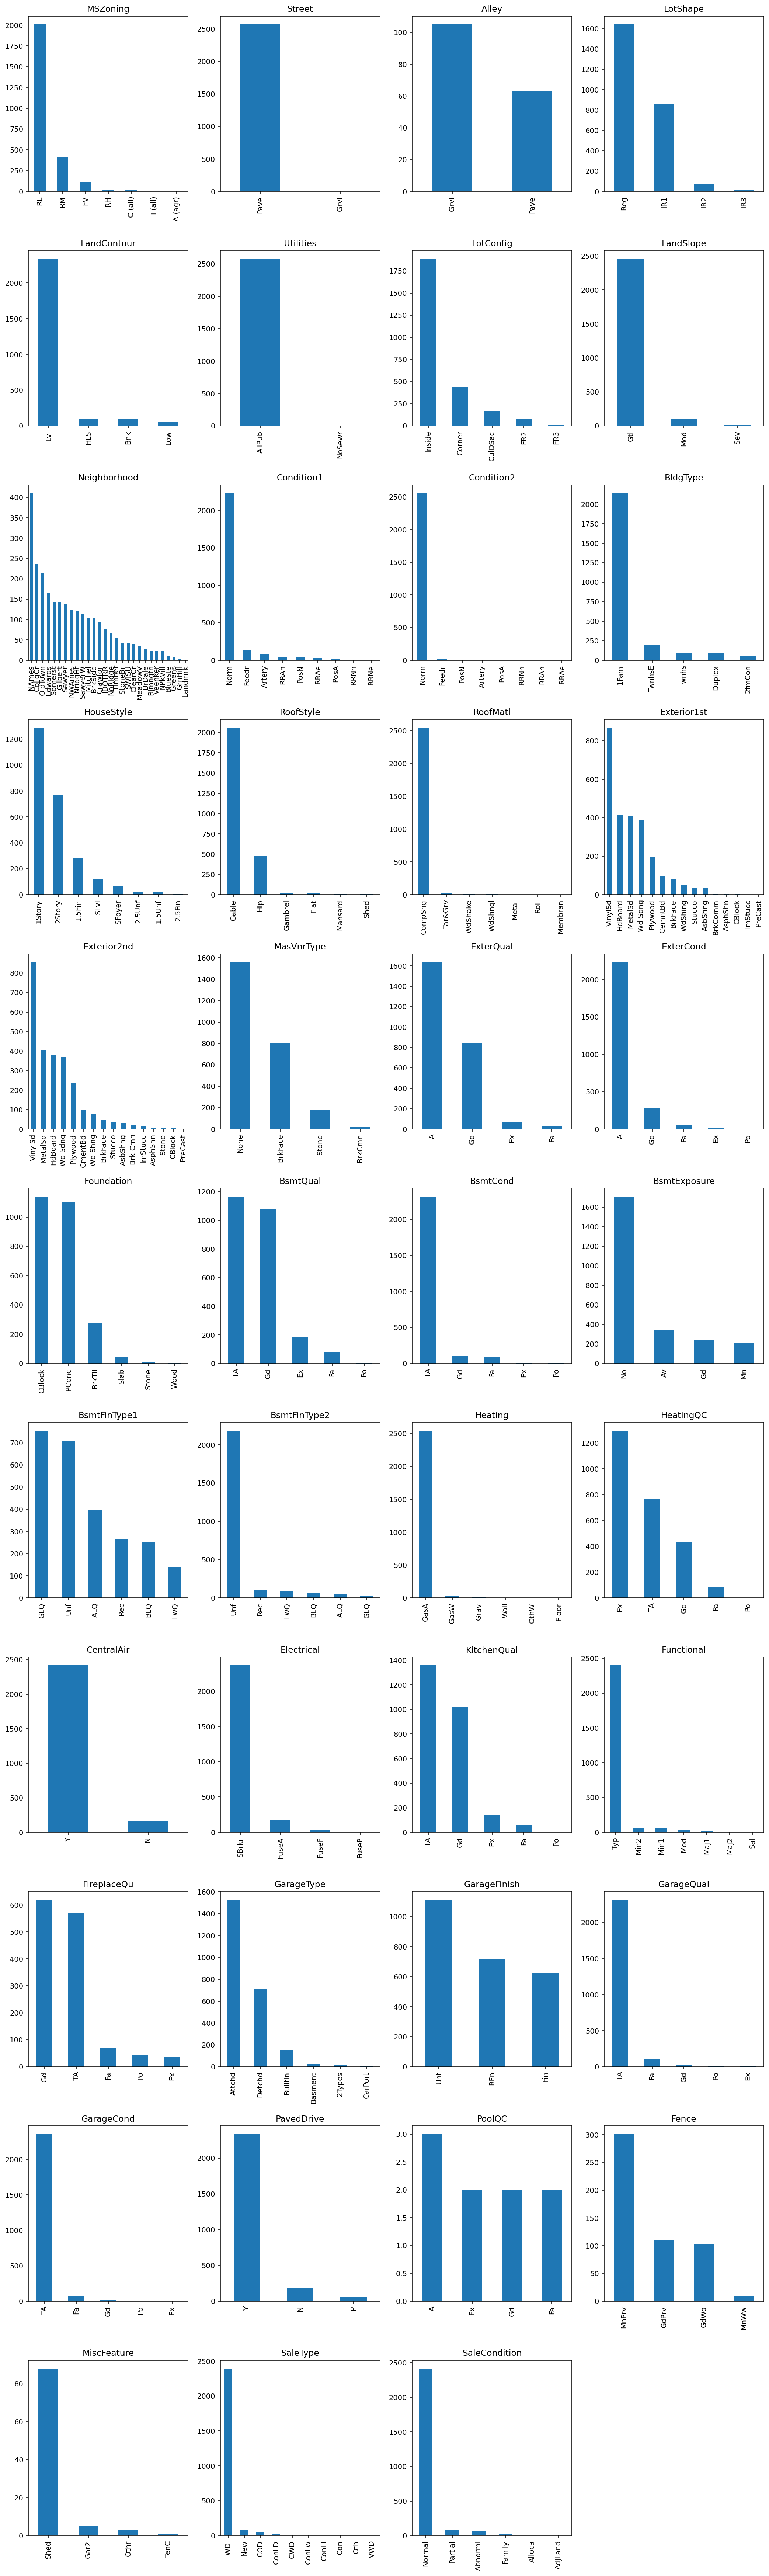

In [9]:
def check_class_imbalance(df, nrow, ncol):
    '''
    Function creates subplots of all 'categorical' columns in our dataframe and outputs count of occurance for all 
    classes (categorical) in the dataframe. 
    
    '''

    fig, ax  = plt.subplots(figsize = (15, 50))
    for n, col in enumerate(df.columns):
        plt.subplot(nrow, ncol,n+1) #specify number of rows and number of columns for graph output
        df[col].value_counts().plot.bar()
        plt.title(str(col))
    plt.tight_layout()



check_class_imbalance(df_object, 11,4)



'''
Based on the subplots output, we can see that we have many categorical input variables that have imbalanced 
classes. One way to solve this problem is to combine  minority classes into one. 

This is tricky as we also do not want to lose additional information detrimental to our output. 


'''



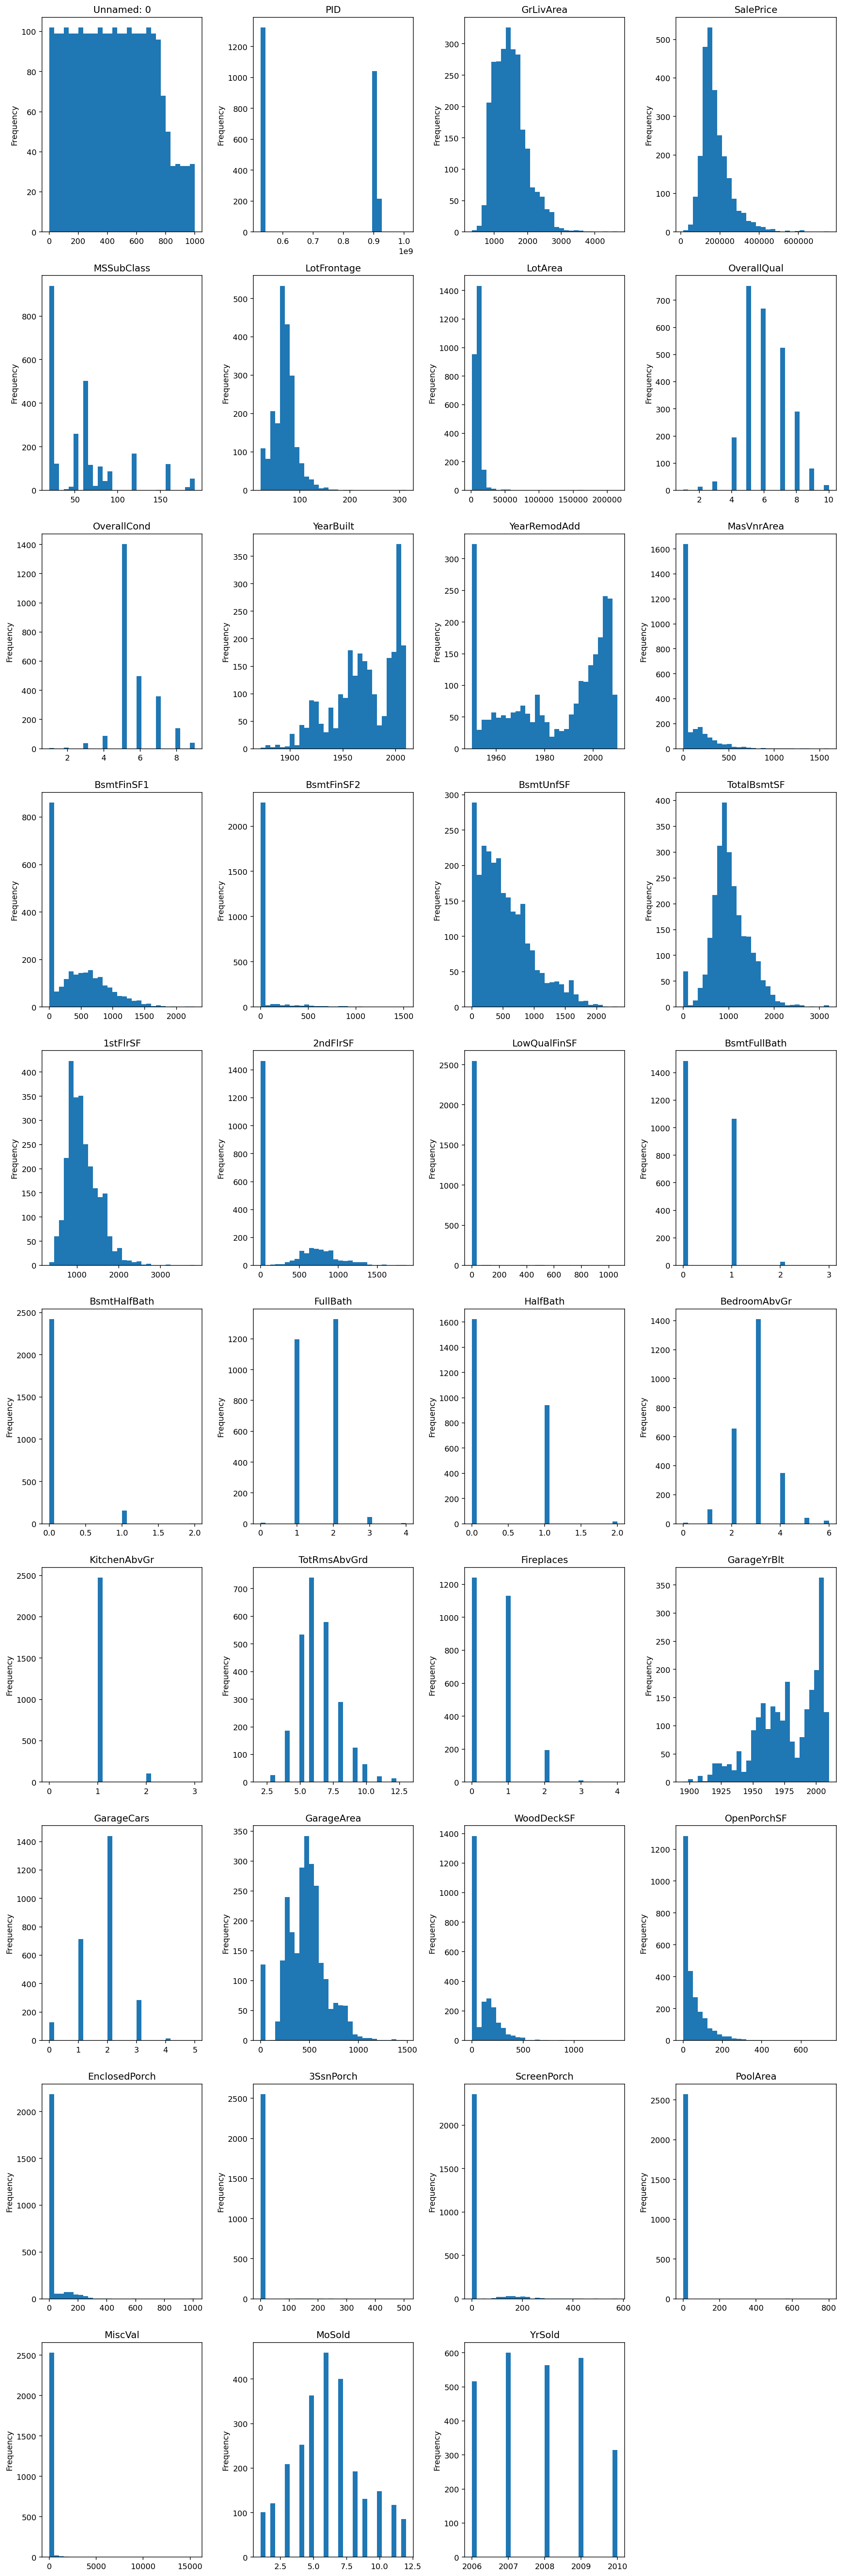

In [27]:
def check_dist(df, nrow, ncol):
    '''
    Function creates subplots of all 'numerical' columns in our dataframe and outputs distribution
    of all numerical datasets. Normally distributed input variables help improve our ML model.
    The more normally distributed, the better. 
    
    
    ***USE Discretization Transforms if necessry ***
    
    '''

    fig, ax  = plt.subplots(figsize = (15, 50))
    for n, col in enumerate(df.columns):
        plt.subplot(nrow, ncol,n+1) #specify number of rows and number of columns for graph output
        df[col].plot.hist(bins = 30)
        plt.title(str(col))
    plt.tight_layout()



check_dist(df_numeric, 11,4)

In [28]:
def target_correlation(df, nrow, ncol):
    '''
    creating subplots of all numerical columns to find correlation between the input variables and our
    target, 'SalePrice'. 
    
    
    '''
    fig, ax  = plt.subplots(figsize = (15, 50))

    for i, col in enumerate(df.columns):
        plt.subplot(nrow,ncol,i+1) 
        plt.title(str(col) + ' & Sales Price Correlation')
        sns.scatterplot(data = df, x = df[col], y = df['SalePrice'])
    plt.tight_layout()


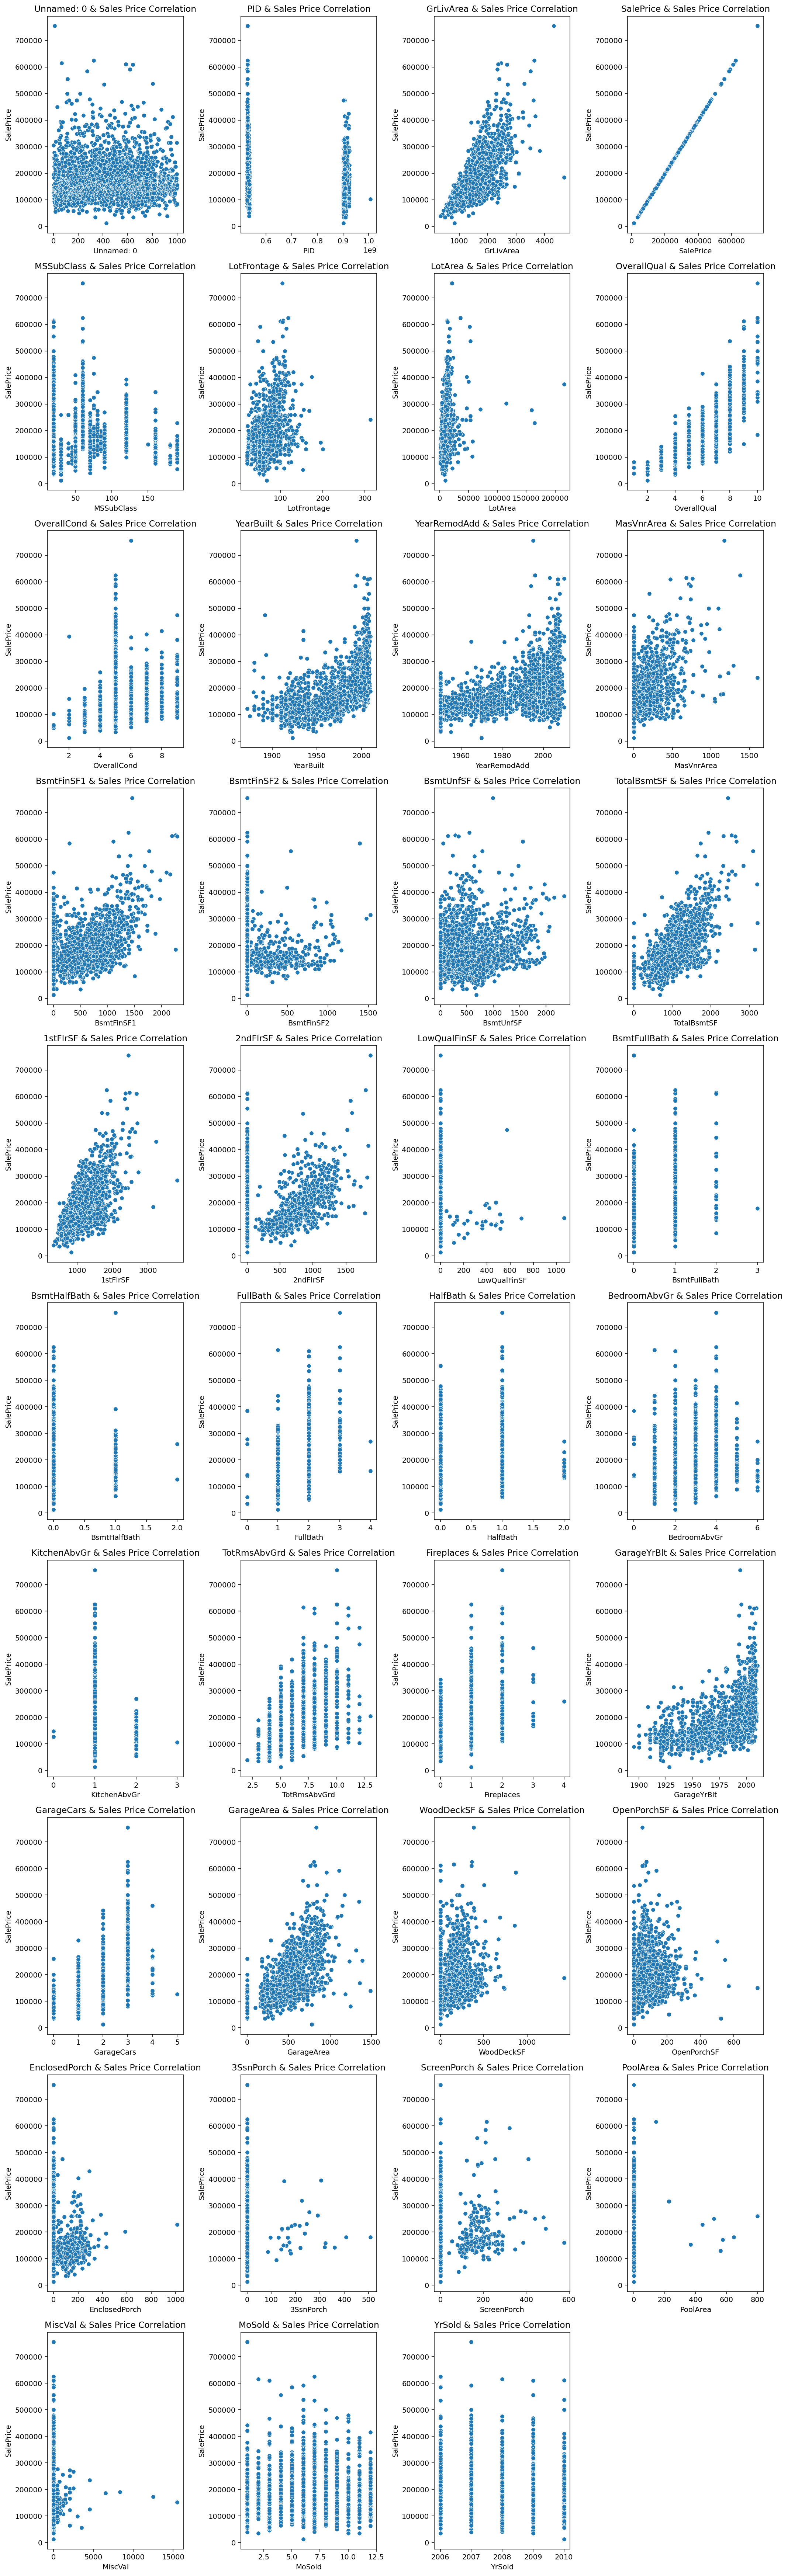

In [29]:
target_correlation(df_numeric,10,4)

## Exploring NA Values

In [ ]:
pd.DataFrame(homes.isna().sum())
'''
Some columns will be removed right away due to reasons exmplained below:


More than 90% NA values:

PoolQC	2571
Fence	2055
MiscFeature	2483
Alley	2412



Contenders for NA impputation. 

*** NOTE *** 

Some NA's are due to the feature not being present in the property (ie. no fireplace)

FireplaceQu	1241 (Just one example, other examples will be found as EDA progresses)

*** NOTE *** 

LotFrontage	462
MasVnrType	14
MasVnrArea	14
BsmtQual	69
BsmtCond	69
BsmtExposure	71
BsmtFinType1	69
BsmtFinSF1	1
BsmtFinType2	70
BsmtFinSF2	1
BsmtUnfSF	1
TotalBsmtSF	1
Electrical	1
BsmtFullBath	2
BsmtHalfBath	2
GarageType	127
GarageYrBlt	129
GarageFinish	129
GarageCars	1
GarageArea	1
GarageQual	129
GarageCond	129
'''




In [33]:
def NA_visualized(df):
    '''
    NA Values Visualized
    darker palette ==  more na values
    '''
    plt.figure(figsize=(20,15));
    return sns.heatmap(df.isna(),cmap="BuPu",cbar=False);

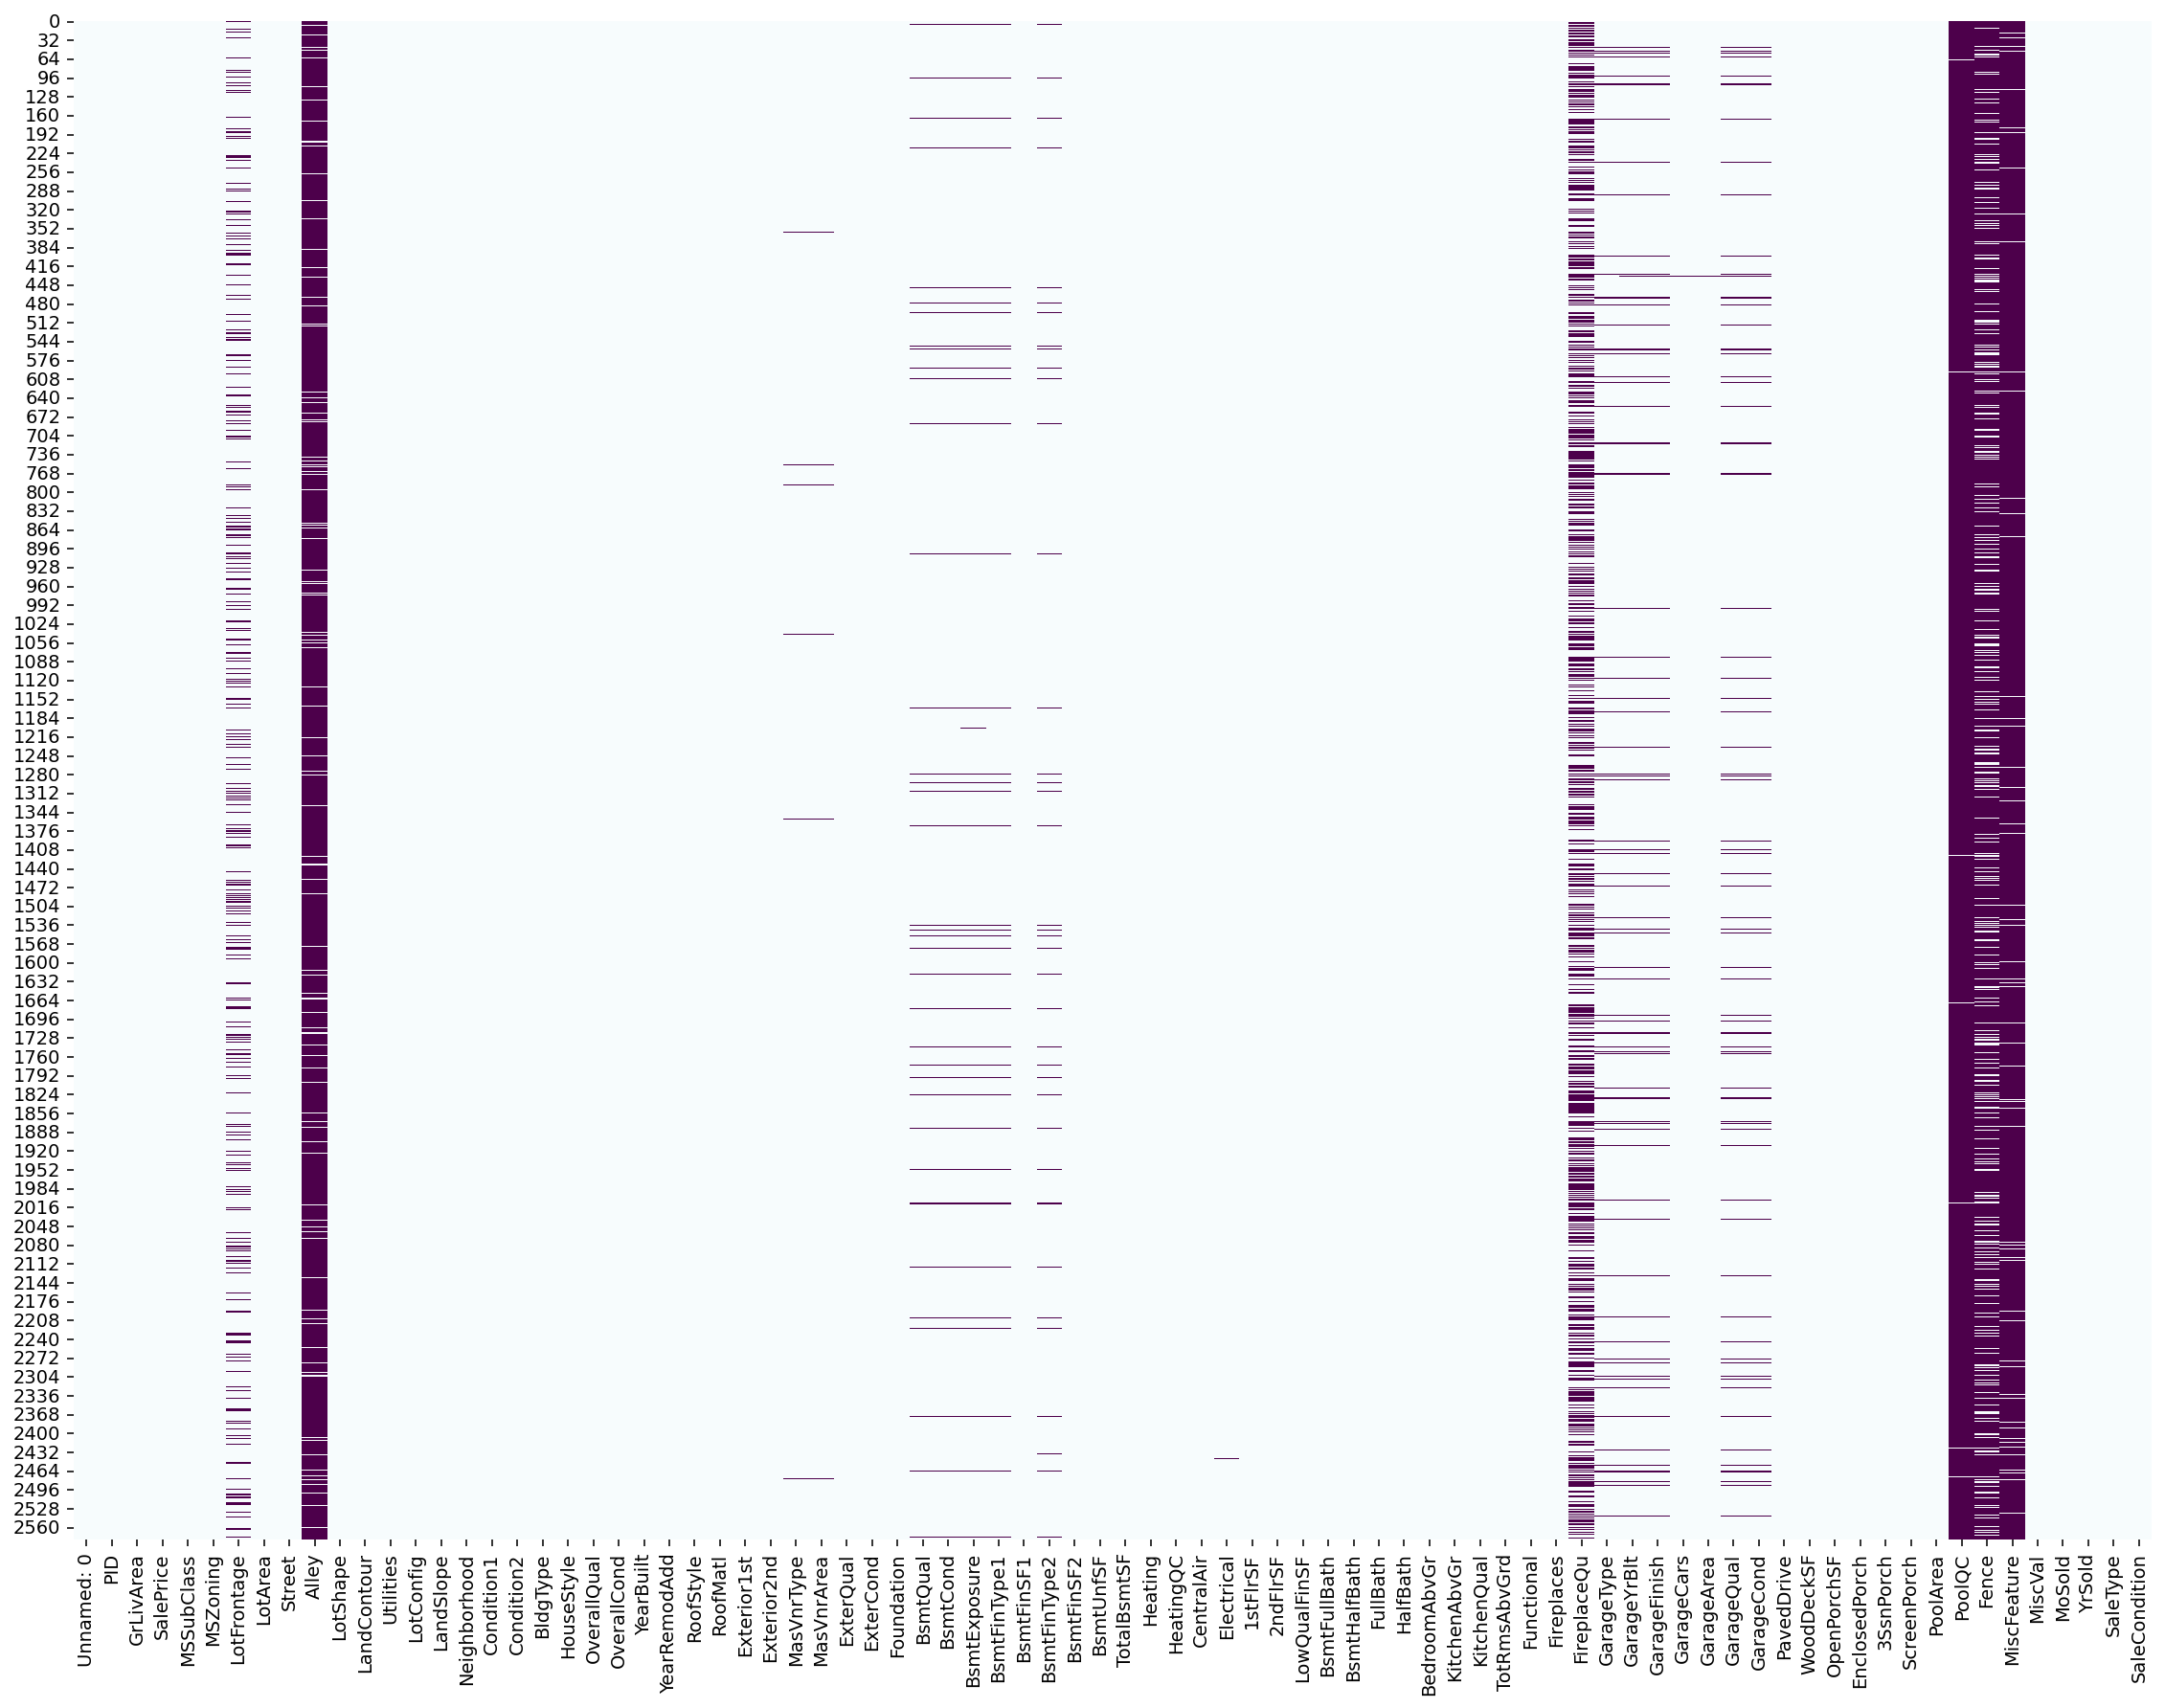

In [35]:
NA_visualized(homes);

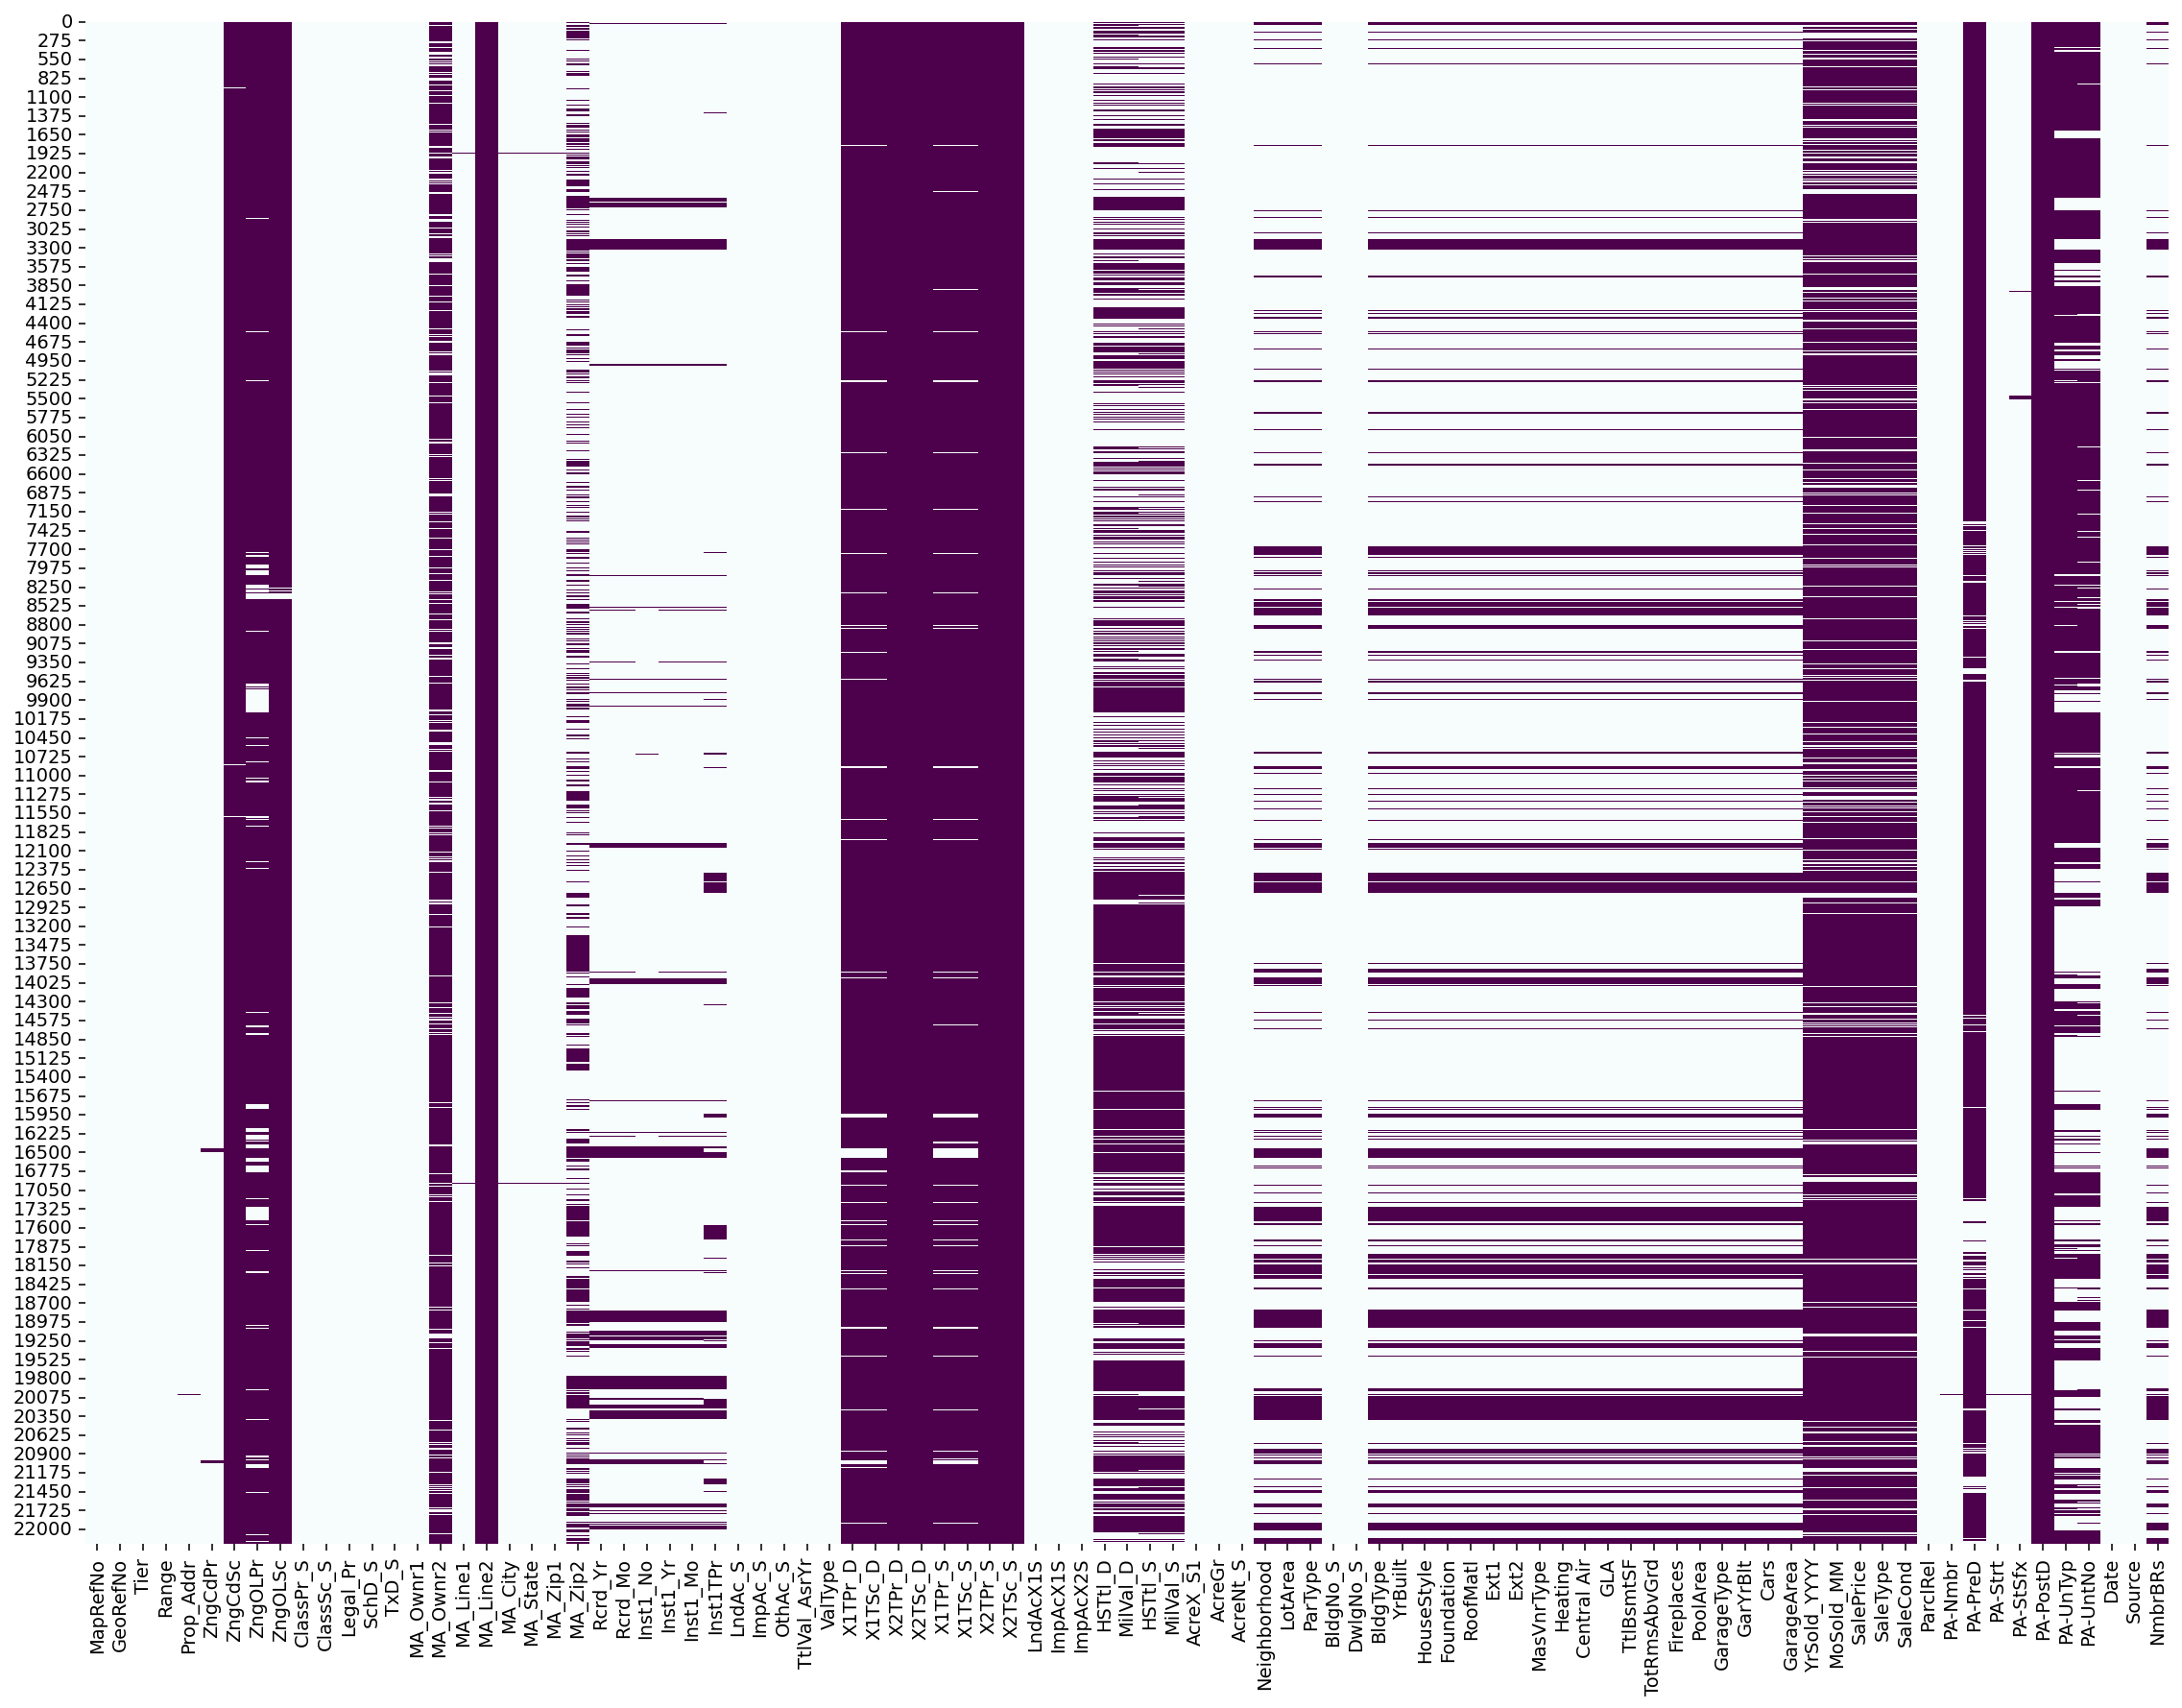

In [37]:
NA_visualized(housing2);

In [ ]:
homes[homes['LotFrontage'].isnull()]

In [ ]:
'''
Only 9 homes have a pool.  All pool related columns will be dropped as to not interfere with our model. 

'''

homes[homes['PoolArea']>0] 





In [ ]:
newdf = homes[homes["Fireplaces"]==1]
newdf['FireplaceQu'].value_counts().plot.bar();  
# Skewed to GD and TA (AVERAGE) + 1241 NA VALUES. Minority classes 
#(Fa, Po,  will be combined together while Ex will be combined with Gd)


'''
Ex --> Excelent
Gd -- > good
Ta --> Average
Fa --> Fair - Prefabricated Fireplace in basement
Po -- Poor - Ben Franklin Stove
Na --> No Fireplace


Combined Classes: 
Gd == Gd + Ex
TA == TA + Fa
Po == Po
Na = no Fireplace

'''

In [ ]:
homes["FireplaceQu"].value_counts() # count of fireplaces (1241 NA VALUES)

In [ ]:
def check_count(col):
    return homes[col].value_counts().plot.bar()

check_count('MSSubClass');

In [ ]:
check_count('OverallQual');

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

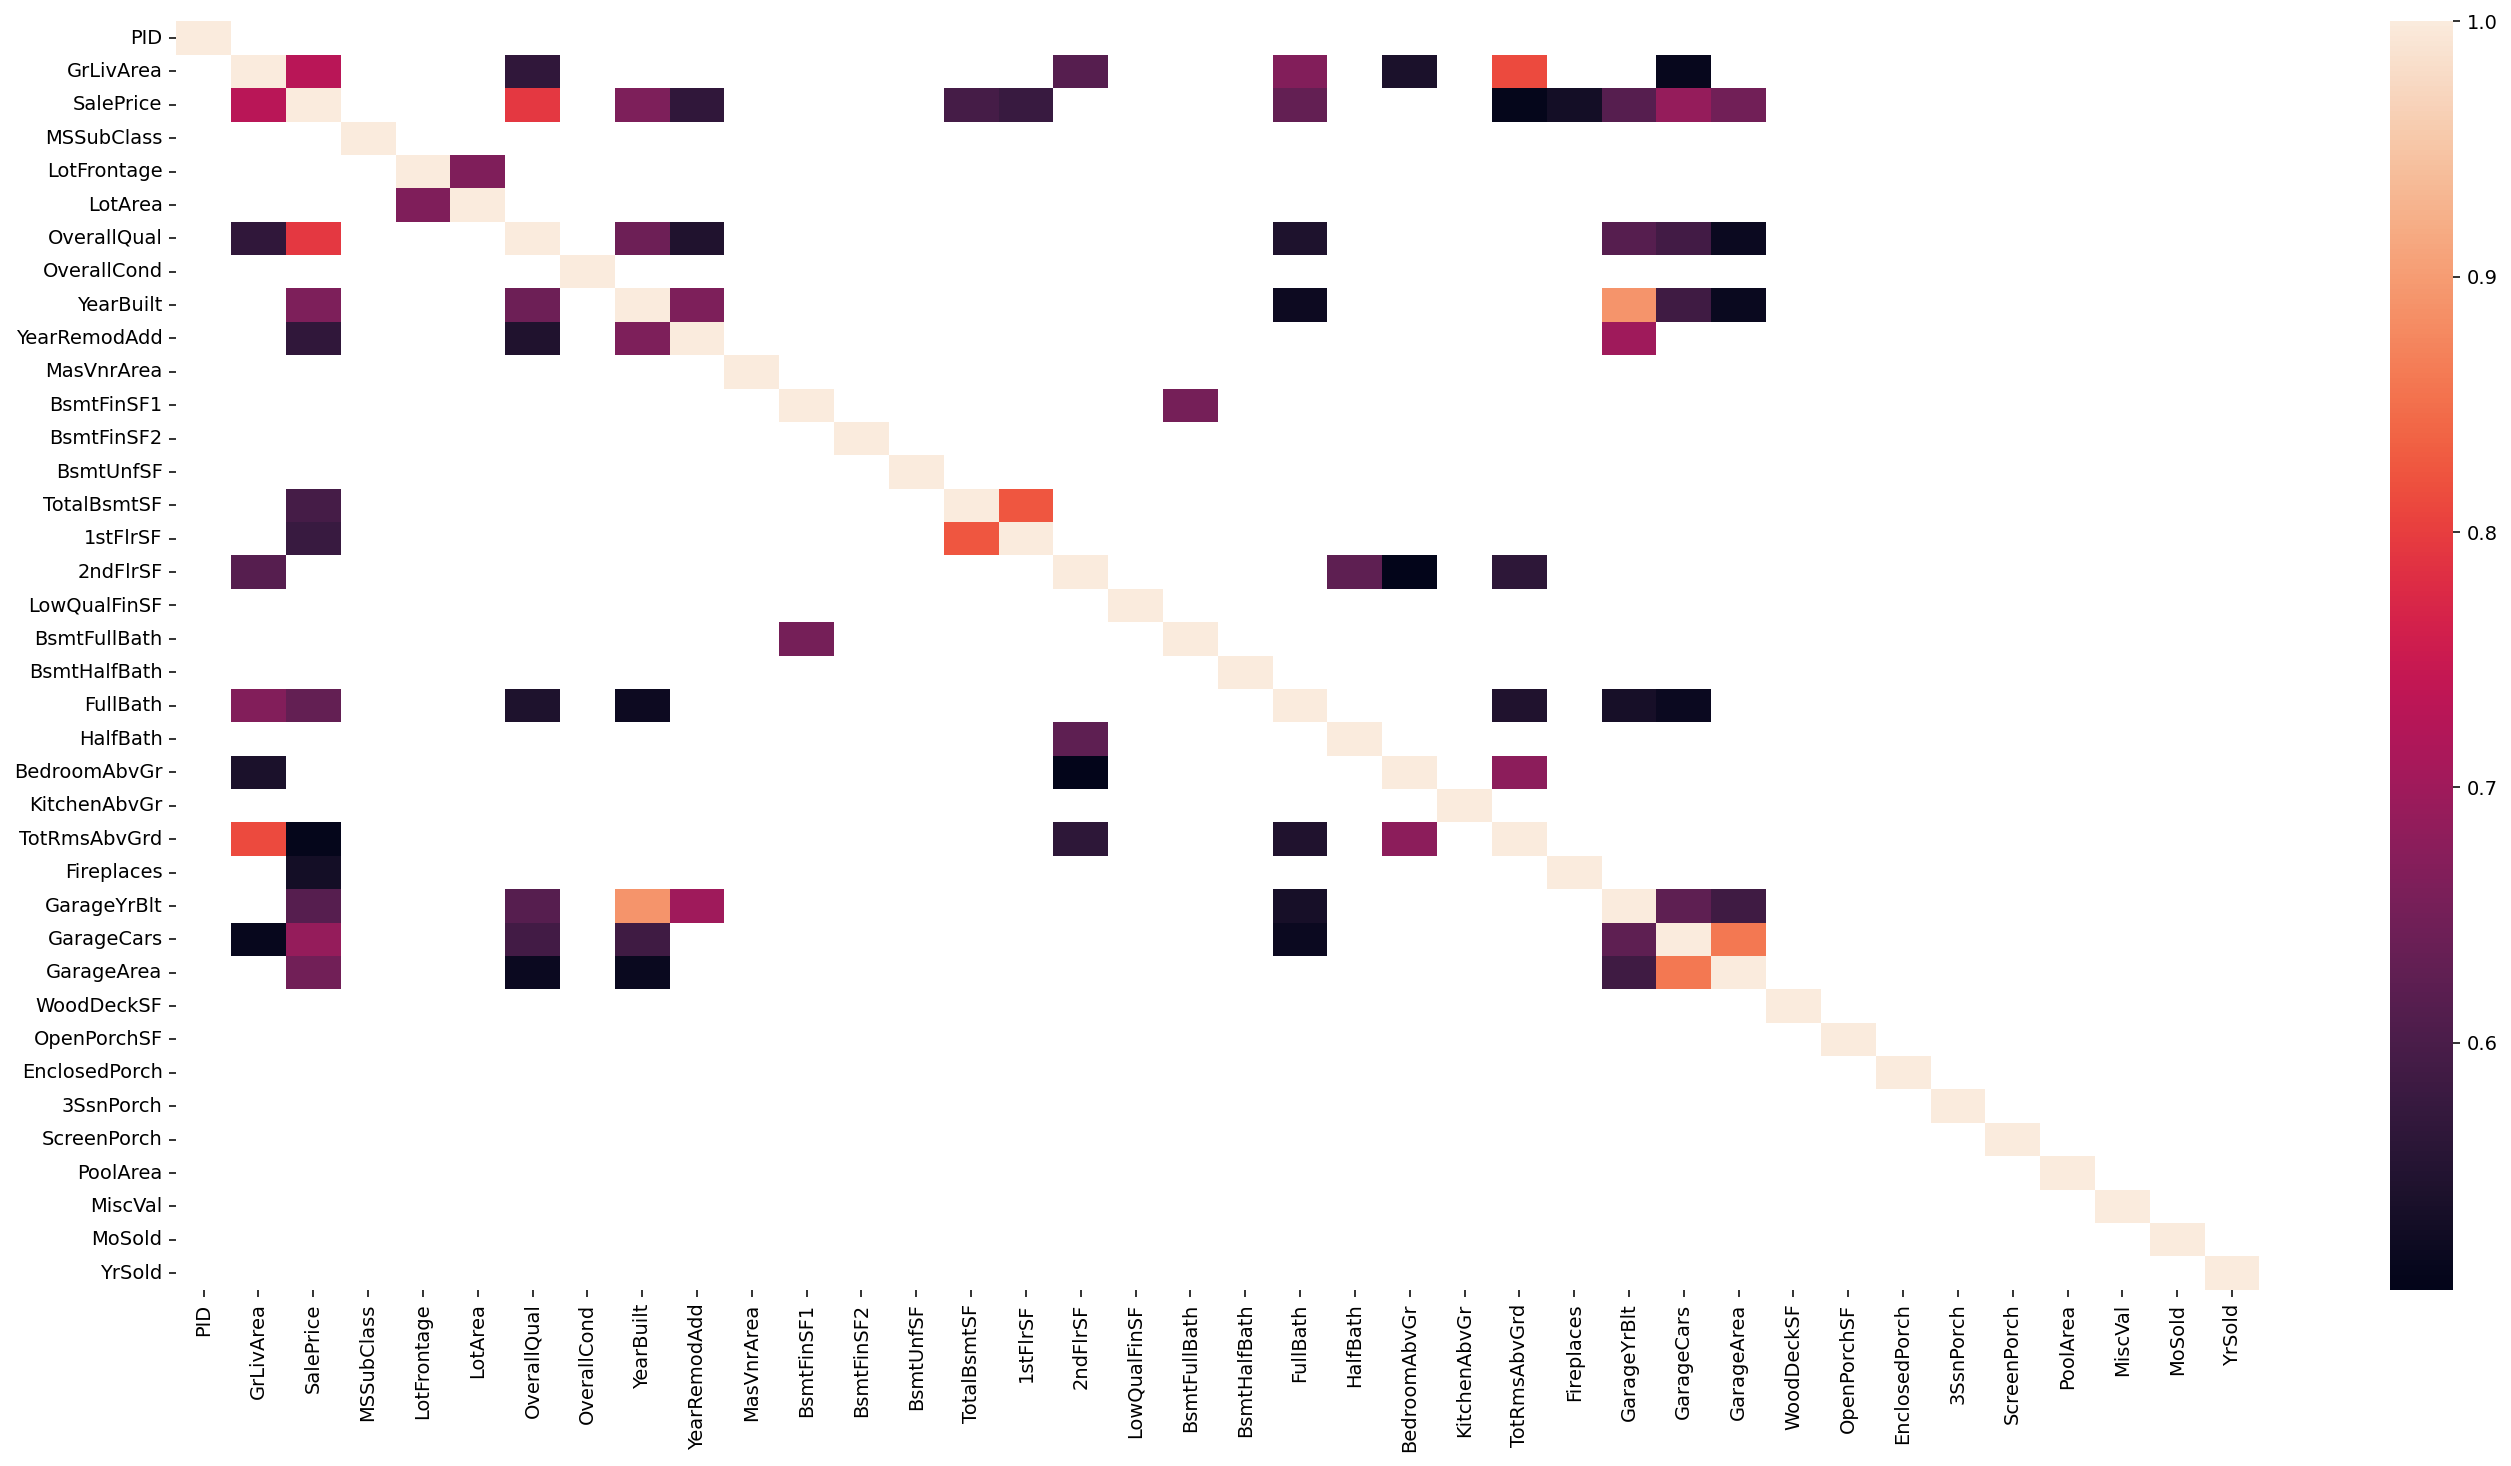

In [38]:

'''Heatmap for all numeric columns with correlation of more than 50%'''

plt.figure(figsize  = (24,12))
num_val=homes.select_dtypes(exclude = 'object')
num_val.drop("Unnamed: 0",axis = 1, inplace = True)
cor = num_val.corr(method = "spearman")
# sns.heatmap(cor, cmap = "coolwarm", )
v = cor[(cor>0.50)].dropna(axis = 1,how = 'all')


sns.heatmap(v,)

In [ ]:
# attempting to see all numeric columns in our features dataframe
df_numeric.isna().sum()

df_numeric_new = df_numeric.apply(lambda x: x.fillna(x.mean()),axis=1) 
# replacing all na's with average of column. this will not be the method of imputing when we get to ML modeling.
# This is only to conduct eda.
df_numeric_new.isna().sum()



In [ ]:
num_features['MasVnrType'].value_counts()

In [ ]:
# Exploring Multicolinearity with VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [ ]:
#Creating a function to calculate VIF (Variance Inflation Factor to determine multicolinearity levels in the 
#numeric features of our dataset)

def calc_vif(dataset):
    viff = pd.DataFrame()
    viff["Features"] = dataset.columns
    viff["VIF_Score"] = [vif(dataset.values, i) for i in range(dataset.shape[1])] #taking the sqrt to improve
    #readibility
    return viff[viff["VIF_Score"]>30]


calc_vif(df_numeric_new)


#columns with High VIF Score:

# 7.  YearBuilt	154.563646
# 8	YearRemodAdd	147.719689
# 10	BsmtFinSF1	inf
# 11	BsmtFinSF2	inf
# 12	BsmtUnfSF	inf
# 13	TotalBsmtSF	inf
# 14	1stFlrSF	inf
# 25	GarageYrBlt	163.295516
# 36	YrSold	157.303896


In [41]:
df_numeric.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass  LotFrontage  \
0           1  909176150        856     126000          30          NaN   
1           2  905476230       1049     139500         120         42.0   
2           3  911128020       1001     124900          30         60.0   
3           4  535377150       1039     114000          70         80.0   
4           5  534177230       1665     227000          60         70.0   

   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0     7890            6            6       1939          1950         0.0   
1     4235            5            5       1984          1984       149.0   
2     6060            5            9       1930          2007         0.0   
3     8146            4            8       1900          2003         0.0   
4     8400            8            6       2001          2001         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       238.0         0.0      618.0        856.0       856         0   
1       552.0       393.0      104.0       1049.0      1049         0   
2       737.0         0.0      100.0        837.0      1001         0   
3         0.0         0.0      405.0        405.0       717       322   
4       643.0         0.0      167.0        810.0       810       855   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0             0           1.0           0.0         1         0             2   
1             0           1.0           0.0         2         0             2   
2             0           0.0           0.0         1         0             2   
3             0           0.0           0.0         1         0             2   
4             0           1.0           0.0         2         1             3   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             4           1       1939.0         2.0   
1             1             5           0       1984.0         1.0   
2             1             5           0       1930.0         1.0   
3             1             6           0       1940.0         1.0   
4             1             6           0       2001.0         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       399.0           0            0              0          0          166   
1       266.0           0          105              0          0            0   
2       216.0         154            0             42         86            0   
3       281.0           0            0            168          0          111   
4       528.0           0           45              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  
0         0        0       3    2010  
1         0        0       2    2009  
2         0        0      11    2007  
3         0        0       5    2009  
4         0        0      11    2009

In [ ]:
df_numeric_new['GarageArea'].value_counts()
df_numeric['GarageArea'].value_counts()

In [59]:
pd.DataFrame(df_numeric.corr()[(df_numeric.corr()>0.6) | (df_numeric.corr()< -0.6)])


Unnamed: 0  PID  GrLivArea  SalePrice  MSSubClass  LotFrontage  \
Unnamed: 0            1.0  NaN        NaN        NaN         NaN          NaN   
PID                   NaN  1.0        NaN        NaN         NaN          NaN   
GrLivArea             NaN  NaN   1.000000   0.719981         NaN          NaN   
SalePrice             NaN  NaN   0.719981   1.000000         NaN          NaN   
MSSubClass            NaN  NaN        NaN        NaN         1.0          NaN   
LotFrontage           NaN  NaN        NaN        NaN         NaN          1.0   
LotArea               NaN  NaN        NaN        NaN         NaN          NaN   
OverallQual           NaN  NaN        NaN   0.790501         NaN          NaN   
OverallCond           NaN  NaN        NaN        NaN         NaN          NaN   
YearBuilt             NaN  NaN        NaN        NaN         NaN          NaN   
YearRemodAdd          NaN  NaN        NaN        NaN         NaN          NaN   
MasVnrArea            NaN  NaN        NaN        NaN         NaN          NaN   
BsmtFinSF1            NaN  NaN        NaN        NaN         NaN          NaN   
BsmtFinSF2            NaN  NaN        NaN        NaN         NaN          NaN   
BsmtUnfSF             NaN  NaN        NaN        NaN         NaN          NaN   
TotalBsmtSF           NaN  NaN        NaN   0.652222         NaN          NaN   
1stFlrSF              NaN  NaN        NaN   0.642613         NaN          NaN   
2ndFlrSF              NaN  NaN   0.665001        NaN         NaN          NaN   
LowQualFinSF          NaN  NaN        NaN        NaN         NaN          NaN   
BsmtFullBath          NaN  NaN        NaN        NaN         NaN          NaN   
BsmtHalfBath          NaN  NaN        NaN        NaN         NaN          NaN   
FullBath              NaN  NaN   0.643937        NaN         NaN          NaN   
HalfBath              NaN  NaN        NaN        NaN         NaN          NaN   
BedroomAbvGr          NaN  NaN        NaN        NaN         NaN          NaN   
KitchenAbvGr          NaN  NaN        NaN        NaN         NaN          NaN   
TotRmsAbvGrd          NaN  NaN   0.807445        NaN         NaN          NaN   
Fireplaces            NaN  NaN        NaN        NaN         NaN          NaN   
GarageYrBlt           NaN  NaN        NaN        NaN         NaN          NaN   
GarageCars            NaN  NaN        NaN   0.638801         NaN          NaN   
GarageArea            NaN  NaN        NaN   0.634992         NaN          NaN   
WoodDeckSF            NaN  NaN        NaN        NaN         NaN          NaN   
OpenPorchSF           NaN  NaN        NaN        NaN         NaN          NaN   
EnclosedPorch         NaN  NaN        NaN        NaN         NaN          NaN   
3SsnPorch             NaN  NaN        NaN        NaN         NaN          NaN   
ScreenPorch           NaN  NaN        NaN        NaN         NaN          NaN   
PoolArea              NaN  NaN        NaN        NaN         NaN          NaN   
MiscVal               NaN  NaN        NaN        NaN         NaN          NaN   
MoSold                NaN  NaN        NaN        NaN         NaN          NaN   
YrSold                NaN  NaN        NaN        NaN         NaN          NaN   

               LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Unnamed: 0         NaN          NaN          NaN        NaN           NaN   
PID                NaN          NaN          NaN        NaN           NaN   
GrLivArea          NaN          NaN          NaN        NaN           NaN   
SalePrice          NaN     0.790501          NaN        NaN           NaN   
MSSubClass         NaN          NaN          NaN        NaN           NaN   
LotFrontage        NaN          NaN          NaN        NaN           NaN   
LotArea            1.0          NaN          NaN        NaN           NaN   
OverallQual        NaN     1.000000          NaN        NaN           NaN   
OverallCond        NaN          NaN          1.0        NaN           NaN   
Year

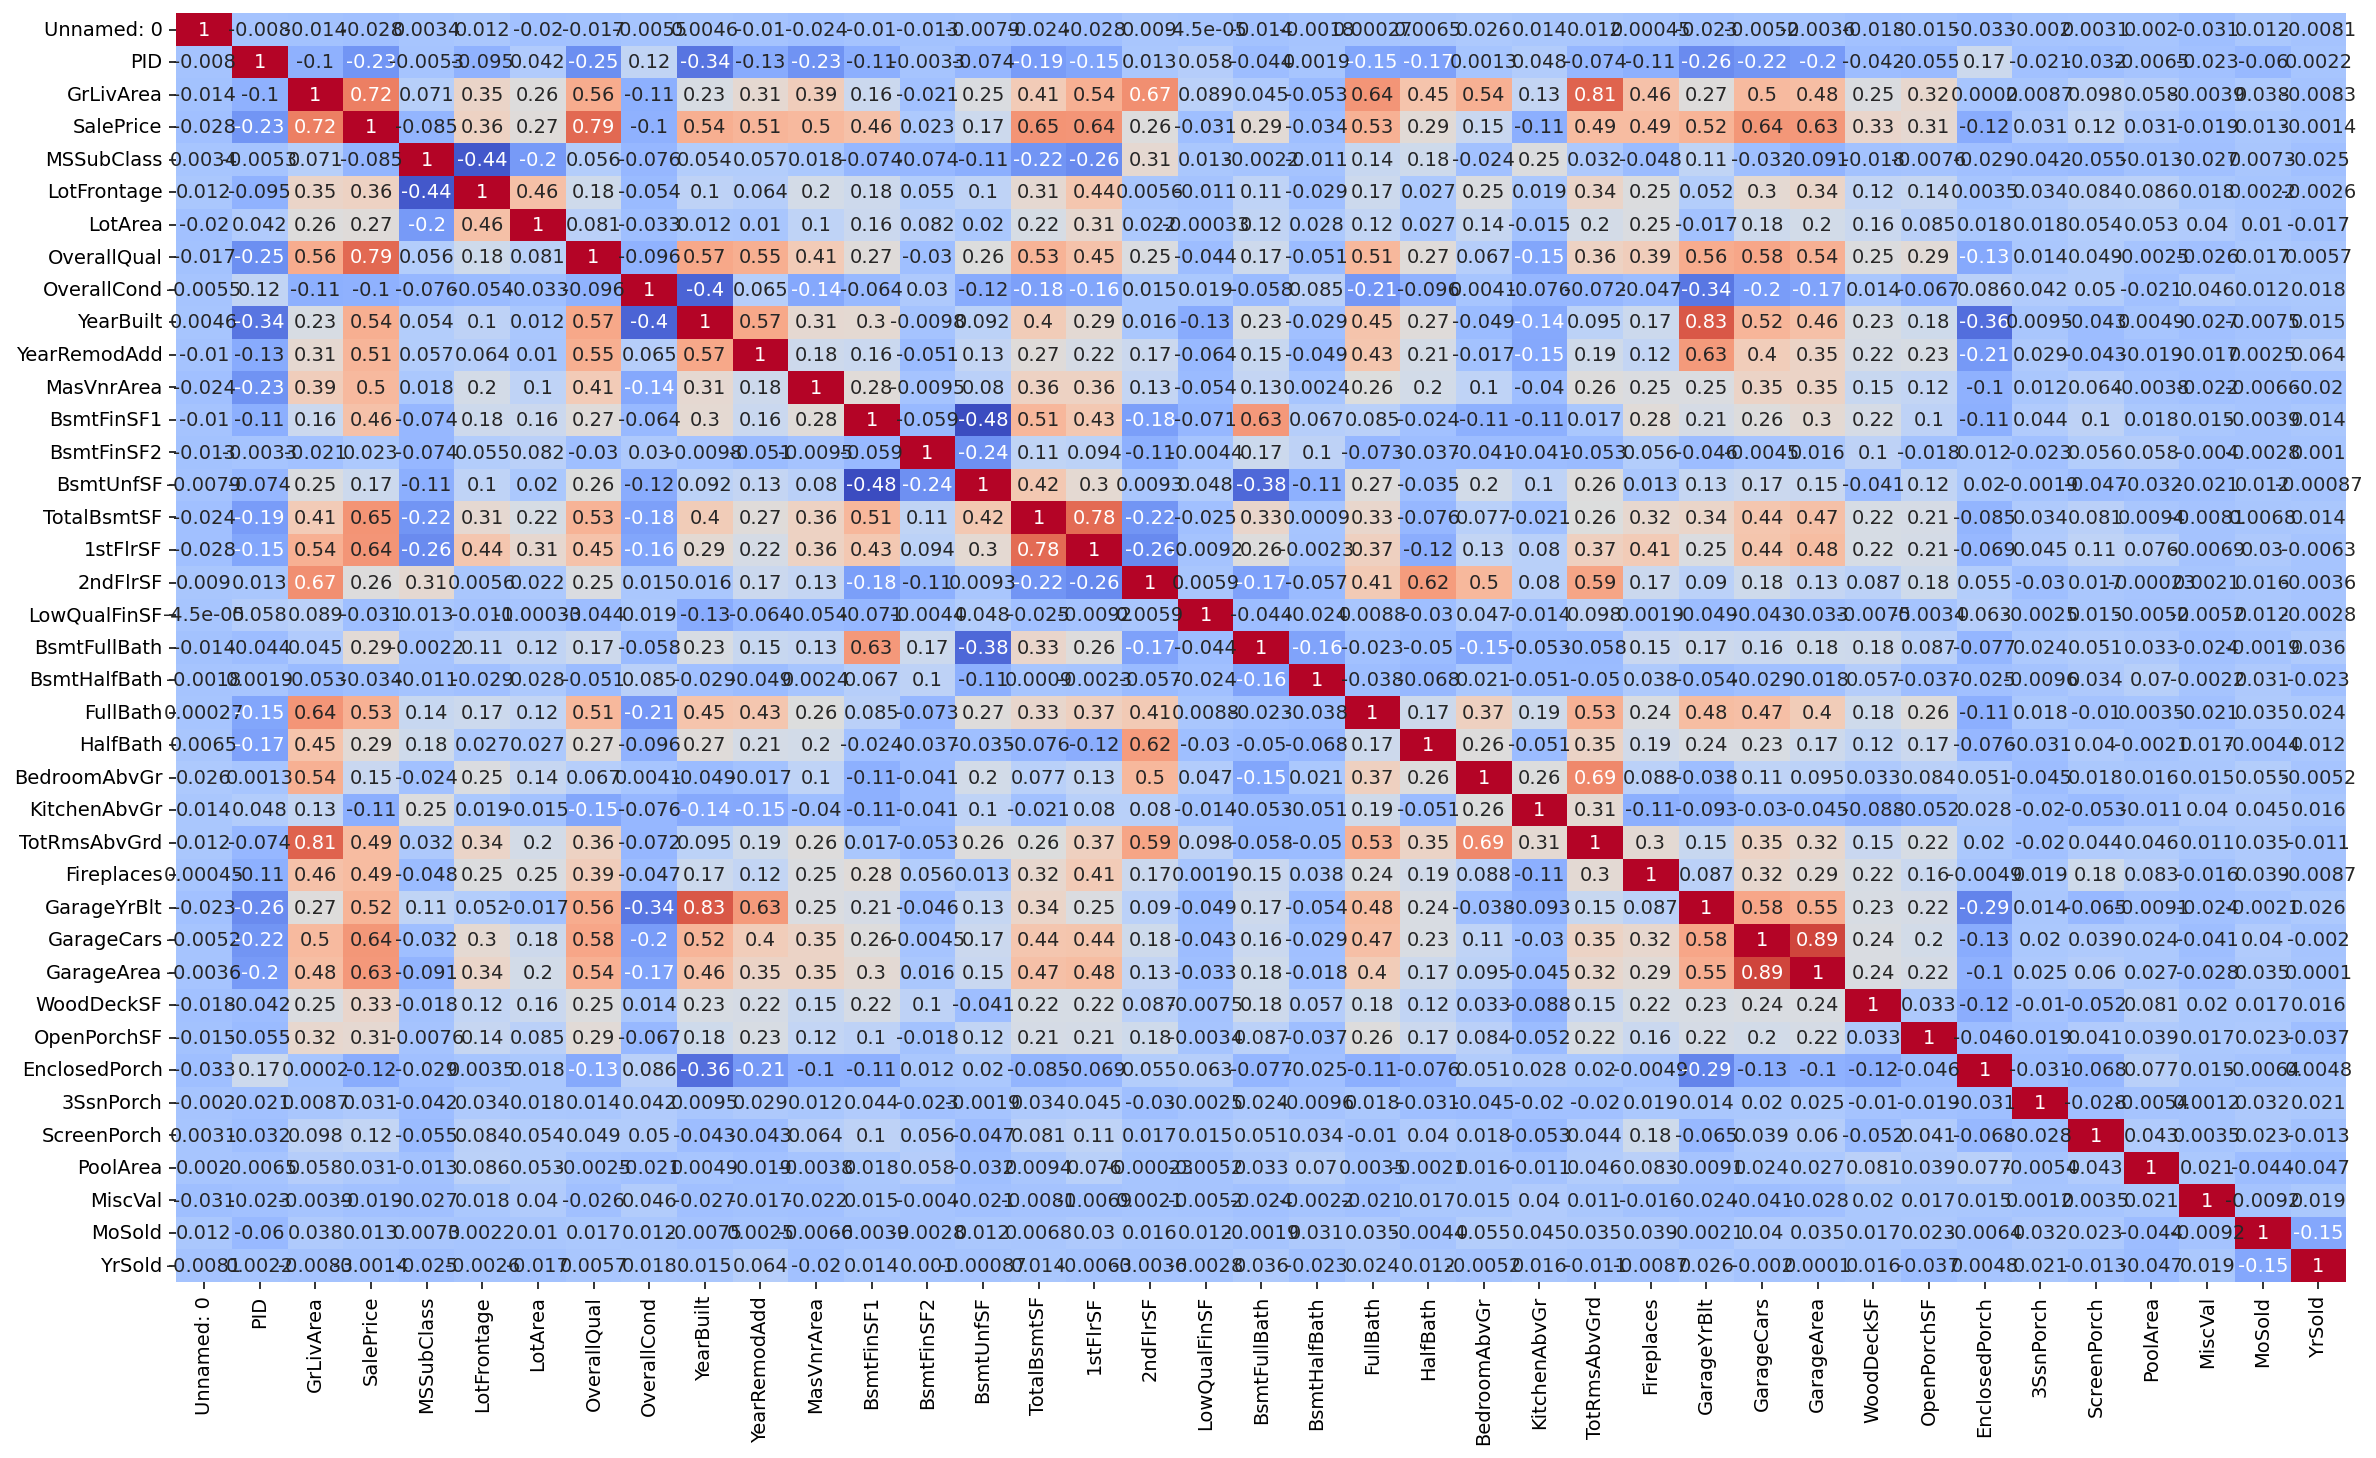

In [39]:
plt.figure(figsize=(20,12));
sns.heatmap(df_numeric.corr(), cmap="coolwarm", cbar=False, annot=True);
#columns with High VIF Score:

'''

There are few numerical columns that have high covariance score. 

GarageCars - GarageArea
GarageYrBlt - YrBlt
GrLivArea - TotalRmsAbvGrnd - 2ndFlrSF -FullBath



SalePrice correlation:  GrLivArea , TotRmsAbvGrd, OverallQual, GarageArea, GarageCars, TotalBsmtSF, 1stFlrSF
 ( Many of these are correlated, so they can be dropped based on whether one has higher correlation with SalePrice)
'''

In [ ]:
df_numeric_new.drop('TotRmsAbvGrd', inplace = True, axis = 1)

In [ ]:
calc_vif(df_numeric_new)

In [ ]:
sns.scatterplot(data = num_feat_target, x = "GrLivArea", y = "target");

In [ ]:
homes['GarageArea'].isna().sum()

In [ ]:
def scatter_rel(data, x):
    sns.scatterplot(data = data, x = x, y = 'SalePrice')


In [ ]:
plt.subplot(222)
scatter_rel(df_numeric,"GarageArea"); 


In [ ]:
homes["GarageArea"].value_counts().sort_values() #we have 127 garage areas with 0 squarefeet
scatter_rel(df_numeric_new, "GarageArea")

In [ ]:
scatter_rel(df_numeric, "LotArea"); 

In [ ]:
scatter_rel(df_numeric_new, "LotArea"); 

In [ ]:
scatter_rel("GrLivArea"); 

In [ ]:
scatter_rel(df_numeric, "LotArea"); 

In [ ]:
scatter_rel('1stFlrSF'); #highly correlated

In [ ]:
scatter_rel(df_numeric,
            'TotalBsmtSF')

In [ ]:
scatter_rel(df_numeric_new,
            'TotalBsmtSF')

In [ ]:
homes['TotalBsmtSF'].isna().sum()

## Exploring Categorical Columns With Target

In [ ]:
homes.head()

In [ ]:
sns.boxplot(data = homes, x ="LotConfig", y ="SalePrice");

In [ ]:
homes["LotConfig"].value_counts().plot.bar();

In [ ]:
def box_plot(data,x,hue = None, y = 'SalePrice', orient = 'v'):
    plt.figure(figsize=(20,12));
    plt.title('Average Sales Price & '+ str(x))
    return sns.boxplot(data = data, x = x, hue = hue, y = y, orient = orient);

box_plot(data = df_numeric,x = "OverallQual");

In [ ]:
def bar_plot(data,x,hue = None, y = 'SalePrice', orient = 'v'):
    plt.figure(figsize=(20,12));
    plt.title('Average Sales Price & '+ str(x))
    return sns.barplot(data = data, x = x, hue = hue, y = y, orient = orient);

bar_plot(data = df_numeric,x = "OverallQual");

In [ ]:
bar_plot(data = df_numeric,x = "OverallCond"); 
# Average Salesprice for homes with condition of '5', is higher than all other conditions that are higher.
# this could mean that some people prefer to buy homes in better neighborhoods with lower condiotion score.
# We can further explore this hypothesis below.

In [ ]:
box_plot(data = homes,x = "Neighborhood", hue = 'OverallCond'); 

In [ ]:
sns.barplot(data = homes[homes['SalePrice']>200000], x = 'SalePrice', y = "Neighborhood");
# We want to see how homes with higher price-point, more than $200,000, in terms of neighborhood.
plt.tight_layout() 

In [ ]:
sns.barplot(data = homes[homes['SalePrice']>300000], x = 'OverallCond', y = "Neighborhood");
# filtering homes with price of more than $200,000 will enable us to see why average price of 
#homes with 'condition' of '5' occur more than homes with better 'condition' 


In [ ]:
sns.barplot(data = homes[homes['SalePrice']<300000], x = 'OverallCond', y = "Neighborhood");

In [ ]:
box_plot(df_numeric, "GarageCars");

In [ ]:
box_plot(df_numeric, "MSSubClass");
#MSSubClass: Identifies the type of dwelling involved in the sale.	

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	"LotFrontage"
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
sns.catplot(data = df_numeric, x = "MSSubClass", y = "SalePrice");

In [ ]:
box_plot(df_numeric, "OverallCond");

In [ ]:
box_plot(homes, "MSZoning");

In [ ]:
scatter_rel(df_numeric, "YearBuilt"); 

In [ ]:
scatter_rel(df_numeric, "YearRemodAdd"); 

In [ ]:
scatter_rel(df_numeric, "LotFrontage"); 

In [ ]:
homes['LotFrontage'].isna().count()

In [ ]:
scatter_rel(homes, "LotArea"); 

In [ ]:
scatter_rel(homes, "LotFrontage"); 

In [ ]:
# GrLivArea

homes['GrLivArea'].isna().sum() # no na values
scatter_rel(homes, "GrLivArea"); 

In [ ]:
homes['MasVnrType'].head()

In [ ]:
homes['MasVnrType'].isna().sum()

In [ ]:
homes['MasVnrType'].value_counts()
#None       1559

In [ ]:
homes["MasVnrType"].value_counts().plot.bar();



### Dealing with Categorical Values  and determining how to encode

In [ ]:
homes.head()

In [ ]:
cat = list(df_object.columns) + ['MSSubClass']+ ['OverallQual']+ ['OverallCond']
h = {}
for i in cat:

    h[i] = homes[i].value_counts()
    
    
print(h) #all classes for all categorical columns

In [68]:
box_plot(homes, 'Neighborhood') # MSZoning has not large impact on SalePrice --> nominal

NameError: name 'box_plot' is not defined

In [ ]:
check_class_imbalance(df_object, 11,4)

In [ ]:
homes.columns

In [67]:
homes.head(20)

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0            1  909176150        856     126000          30       RL   
1            2  905476230       1049     139500         120       RL   
2            3  911128020       1001     124900          30  C (all)   
3            4  535377150       1039     114000          70       RL   
4            5  534177230       1665     227000          60       RL   
5            6  908128060       1922     198500          85       RL   
6            7  902135020        936      93000          20       RM   
7            8  528228540       1246     187687          20       RL   
8            9  923426010        889     137500          20       RL   
9           10  908186050       1072     140000         180       RM   
10          11  528186170       1342     219500         120       RL   
11          12  923426070       1274     136000          60       RL   
12          13  902204080        861      80000          30       RM   
13          14  535105100       1394     159000          20       RL   
14          15  907405020       1536     214000          20       RL   
15          16  531382110       1680     163000          60       RL   
16          17  906380120       1274     203000          20       RL   
17          18  909101060        864      67000          30       RL   
18          19  534152050       1610     205000          20       RL   
19          20  923252075       1091     131250          80       RL   

    LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0           NaN     7890   Pave   NaN      Reg         Lvl    AllPub   
1          42.0     4235   Pave   NaN      Reg         Lvl    AllPub   
2          60.0     6060   Pave   NaN      Reg         Lvl    AllPub   
3          80.0     8146   Pave   NaN      Reg         Lvl    AllPub   
4          70.0     8400   Pave   NaN      Reg         Lvl    AllPub   
5          64.0     7301   Pave   NaN      Reg         Lvl    AllPub   
6          60.0     6000   Pave  Pave      Reg         Bnk    AllPub   
7          53.0     3710   Pave   NaN      Reg         Lvl    AllPub   
8          74.0    12395   Pave   NaN      Reg         Lvl    AllPub   
9          35.0     3675   Pave   NaN      Reg         Lvl    AllPub   
10         48.0     6240   Pave   NaN      Reg         Lvl    AllPub   
11         63.0    10475   Pave   NaN      Reg         Lvl    AllPub   
12         62.0     7404   Pave   NaN      Reg         Lvl    AllPub   
13          NaN     9500   Pave   NaN      IR1         Lvl    AllPub   
14         70.0     9135   Pave   NaN      Reg         Lvl    AllPub   
15         50.0     8480   Pave   NaN      IR1         Lvl    AllPub   
16         68.0     8814   Pave   NaN      Reg         Lvl    AllPub   
17         45.0     8248   Pave  Grvl      Reg         Lvl    AllPub   
18          NaN    10603   Pave   NaN      IR1         Lvl    AllPub   
19         62.0     7706   Pave   NaN      Reg         Lvl    AllPub   

   LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0     Corner       Gtl        SWISU       Norm       Norm     1Fam     1Story   
1     Inside       Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
2     Inside       Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
3     Corner       Gtl      OldTown       Norm       Norm     1Fam     2Story   
4     Inside       Gtl       NWAmes       Norm       Norm     1Fam     2Story   
5     Corner       Gtl      Edwards       Norm       Norm     1Fam     SFoyer   
6     Inside       Mod      OldTown       Norm       Norm   2fmCon     1Story   
7     Inside       Gtl      Blmngtn       Norm       Norm     1Fam     1Story   
8     Corner       Gtl      Mitchel       Norm       Norm     1Fam     1Story   
9     Inside       Gtl      Edwards       Norm       Norm   TwnhsE     SFoyer   
10    Inside       Gtl      NridgHt       Norm       Norm   TwnhsE     1Story   
11    

In [66]:
homes['GrLivArea'].value_counts()

864     38
1040    25
1092    24
1456    15
912     14
        ..
2501     1
1477     1
1837     1
2668     1
1911     1
Name: GrLivArea, Length: 1213, dtype: int64

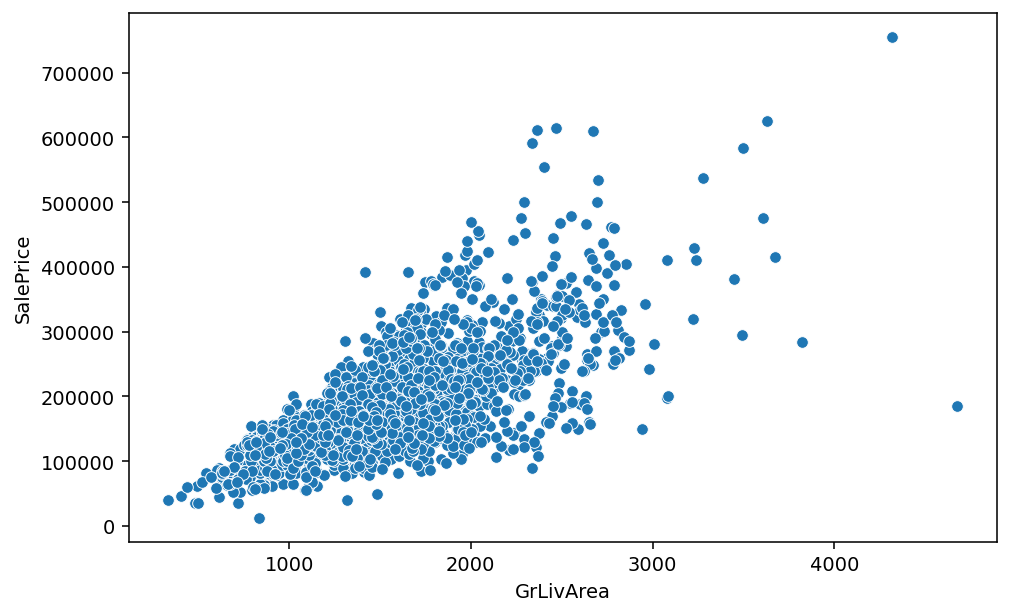

In [65]:
sns.scatterplot(data = homes, x = 'GrLivArea', y = 'SalePrice');

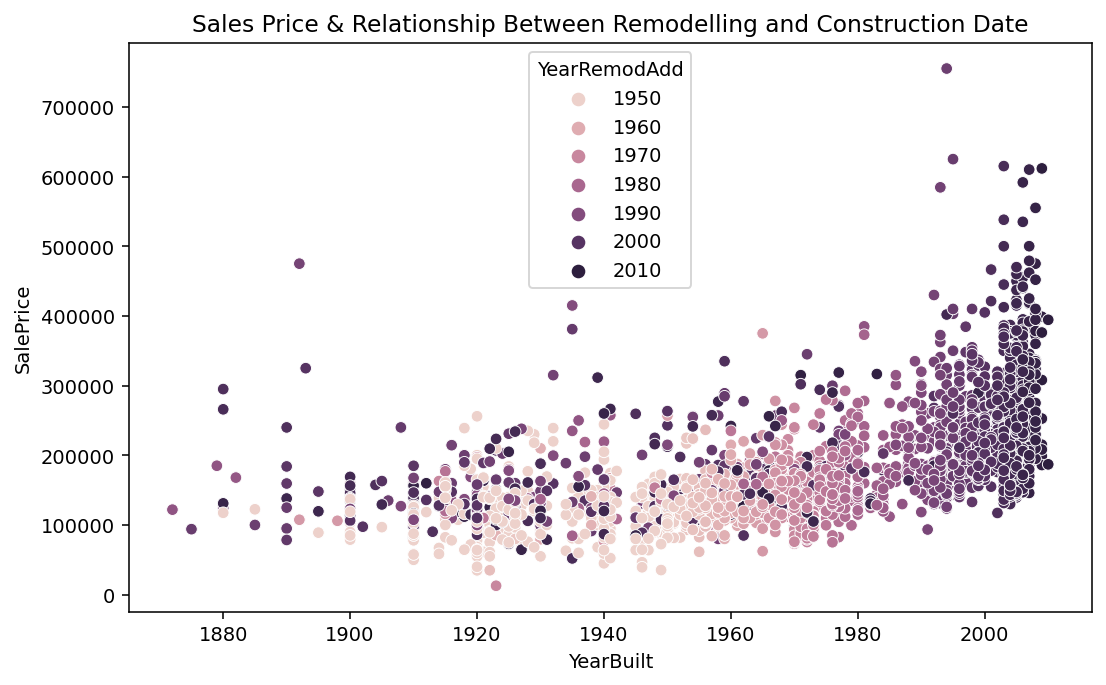

In [64]:

plt.title("Sales Price & Relationship Between Remodelling and Construction Date")
sns.scatterplot(data = homes, x = 'YearBuilt', y = 'SalePrice', hue = 'YearRemodAdd');

plt.tight_layout()


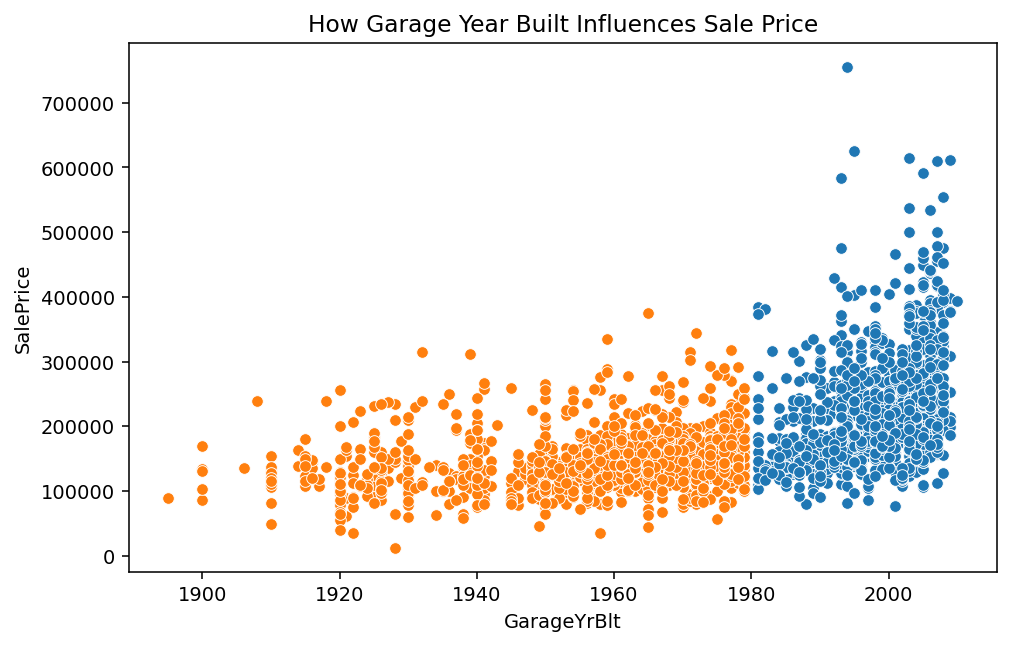

In [63]:
plt.title('How Garage Year Built Influences Sale Price')
sns.scatterplot(data = homes[homes.GarageYrBlt>1980], x = 'GarageYrBlt', y = 'SalePrice');
sns.scatterplot(data = homes[homes.GarageYrBlt<1980], x = 'GarageYrBlt', y = 'SalePrice');

In [62]:
homes[homes.GarageYrBlt<2000]['SalePrice'].mean() #1980 (65%) 1990

161695.1959273528

In [61]:
homes['PavedDrive'].value_counts()

Y    2336
N     184
P      60
Name: PavedDrive, dtype: int64

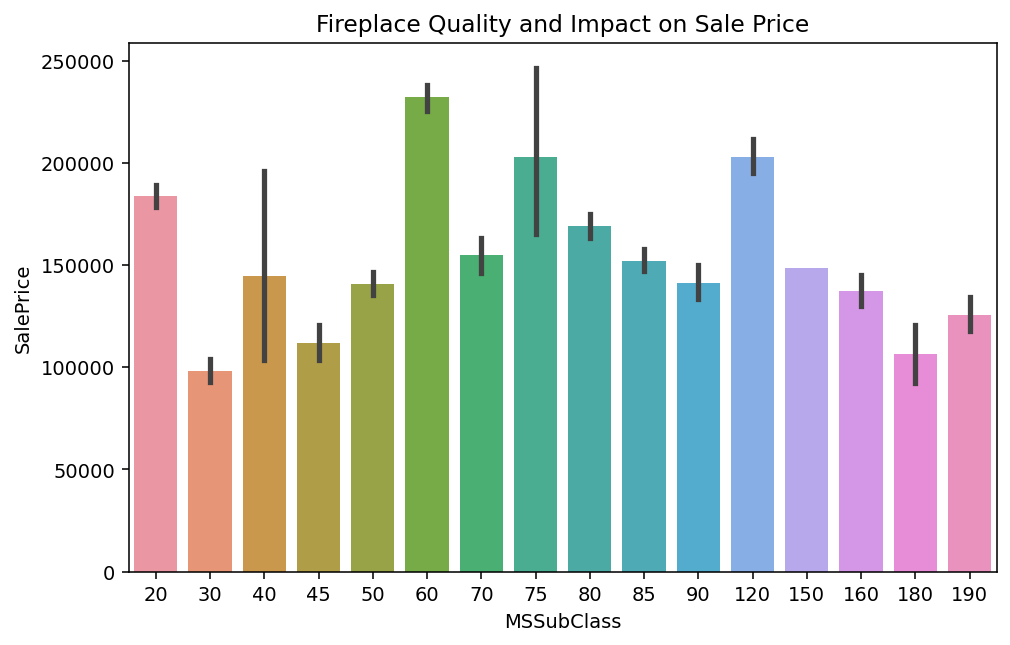

In [60]:
plt.title("Fireplace Quality and Impact on Sale Price")

sns.barplot(data = homes, x = 'MSSubClass', y = 'SalePrice');

In [ ]:
# scatter_re

### Initial Column Drops

<del>'Unnamed: 0'</del>: <i>Provides no valuable information</i>
<br>
<del>'PID'</del>: <i>Provides no valuable information BUT **will be used to merge if second dataset is used </i>
<br>
<del>'Alley'</del>: <i>More than 90% NA Values. Provides no valuable information</i>
<br>
<del>'PoolQC'</del>: <i>More than 90% NA Values. Provides no valuable information</i>
<br>
<del>'Fence'</del>: <i>More than 90% NA Values. Provides no valuable information</i>
<br>
<del>'MiscFeature'</del>: <i>More than 90% NA Values. Provides no valuable information</i>
<br>
<del>'MoSold'</del>: <i>Data Leakage Problem. Column information attained at sale</i>
<br>
<del>'YrSold'</del>: <i>Data Leakage Problem. Column information attained at sale</i>
<br>
<del>'SaleType'</del>: <i>Data Leakage Problem. Column information attained at sale</i>
<br>
<del>'SaleCondition'</del>: <i>Data Leakage Problem. Column information attained at sale</i>
<br>
<del>'MiscVal'</del>: <i>Provides no valuable information </i>

## Feature Selection & Engineering


<del>'PoolArea'</del>: <i>See Feature Engineering Section</i>
<br>
<del>'ScreenPorch',3SsnPorch,EnclosedPorch, OpenPorchSF </del>: <i>See Feature Engineering Section</i>
<br>
<del>'WoodDeckSF'</del>: <i>See Feature Engineering Section</i>
<br>
<del>'GarageQual'</del>: <i>Almost identical to GarageCond especially considering tha minority classes will be combined.</i>
<br>
<del>'GarageCars'</del>: <i>GarageCars and GarageArea are linearly correlated (multicolinearity). GarageCars will be dropped. *** MAY EXPLORE BY INTERCHANGING BOTH AS GarageCars as ordinal Cat. may improve model.</i>
<br>
<del>'FireplaceQu and  Fireplaces '</del>: <i>Since almost half od the homes in the dataset do not have a fireplace and Fireplace Quality classes are skewed, these columns will be dropped and new one will be created to show if fireplace/nofireplace no matter how many fireplaces .See Feature Engineering Section</i>
<br>
<del>'Functionality'</del>: <i>Majority of homes are not damaged and homes with minor damages have average sale price that is not too far away from overall average home price. If we had more examples of 'Salvaged' homes, then it would make sense to keep this column.</i>
<br>
<del>'KitchenAbvGr'</del>: <i>No correlation with SalePrice and similar to KitchenQual.</i>
<br>
<del>'BedroomAbvGr'</del>: <i>No Valuable Information</i>
<br>
<del>'BsmtHalfBath'</del>: <i>No Valuable Information</i>
<br>
<del>'BsmtFullBath'</del>: <i>Create new column boolean : bsmntfullbath, See Feature Engineering Section </i>
<br>
<del>'LowQualFinSF'</del>: <i>Provides no valuable information </i>
<br>
<del>'1stFlrSF' and 2ndFlrSF</del>: <i>Combine the two into totalsft. See Feature Engineering </i>
<del>'Electrical'</del>: <i>Create new columns. isStandElectr.See Feature Engineering </i>
<br>
CentralAir: drop and create new one. Is central air or not
<br>
Heating: most data is gas. no valuable information.
<br>
TotalBsmtSF: combine with totalsft
<br>
BsmtUnfSF: not much correlation with price and low volumen.
<br>
BsmtFinSF2
<br>
BsmtFinType2
<br>
BsmtFinSF1
<br>
BsmtFinType1:
<br>
BsmtCond: Similar to BsmtQual but with more class imbalance
<br>
MasVnrType and MasVnrArea: drop and feature engineer (hasMasVnr)
<br>
Exterior2nd
<br>
RoofMatl: Mostly Standards
<br>
Overall condition: overallQual has better correlation with SalePrice (**May keep**)
<br>
Condition2: all normal
<br>
LotConfig: is_culdesac?
<br>
LandSlope: No valuable information
<br>
Utilities: all same class
<br>
LandContour: isLandContourhls? bollean new column
<br>
LotShape: regular or not (boolean)

<br>
Street: everything is paved almost

<br>
LotArea: not much correlation

<br>


<br>

<br>
<br>
<br>
<br>
<br>
### Feature Selection & Engineering

PoolArea: There is no linear relationship between pool area and SalePrice. If more than 0 square/feet, create new column to indicate pool/no pool.
<br>
OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: All porch related columns have identical relationship with
SalePrice. 4 columns will be dropped and new columns will be created indicating porch/no porch.
<br>
WoodDeckSF: Some linear relationship with SalePrice. If more than 0 square/feet, create new column to indicate wood deck/no wood deck.
<br>
PavedDrive: Imbalanced classes. Most driveways are paved. Combine Minority Classes.
<br>
GarageCond: Imbalanced classes.  (TA    2356 Gd      14 Ex.   3), (Fa      67 Po      11) 
<br>
GarageArea: Only 127NA values. Good linear relationship with SalePrice. 127 entries @0sqrft. Will be used instead of GarageCars
<br>
GarageFinish: 129 NA's (Finished, Rough Finished) Unfinished (ordinal?)
<br>
GarageYrBlt: Up untill 2000, GarageYrBlt has low correlation with SalePrice but after 2000 that relationship increases. New Column will be made of boolean values (built before 2000 and after 2000). There is ~66% change
in average home price when garage is built before 2000 and after 2000. This trend is evident starting from 1980 but since this data is already old (2007-2010), I will use 2000 as the cut-off.**Expecting Similar trend for yrblt of home.**
<br>
GarageType: (Attchd     1527 BuiltIn     153) & (Detchd      716 Basment      27 2Types       21 CarPort       9)
<br>
'FireplaceQu and  Fireplaces ': delete and create new column "YesFireplace"
<br>
TotRmsAbvGrd: As grade goes up, sale price goes up as well until grade 11 and then decline. Ordinal?
<br>
KitchenQual: (TA, Fair, Poor) (Ex) (GD)
<br>
HalfBath: Convert to boolean 0, (1,2) == 1
<br>
FullBath: odinal 1,2,3 bath (3 being best)
<br>
'BsmtFullBath': Create boolean for all basements with full bath
<br>
1stFlrSF' and 2ndFlrSF and TotalBsmtSF : Combine the two columns by adding squarefeet. TotalSQFT (71 homes with no basement)
<br>
Electrical: create new boolean columns. is standard electricity or not
<br>
HeatingQC: create ordinal (Ex) (Good, average) (poor, fair)
<br>
BsmtExposure: Yes or no Boolean
<br>
BsmtQual: ordinal 3-way
<br>
Foundation: combine some minority and ordinal
<br>
MasVnrType and MasVnrArea: new columns hasMasVnr and is MsVnrabv400
<br>
Exterior1st: some encoding
<br>
RoofStyle: Combine Hip/Shade + Gable/everything else
<br>
YearRemodAdd , YearBuilt: is it above yearbuilt above 1980 and yearremod >2000?
<br>
HouseStyle: nominal with minority class combined
<br>
BldgType: 1fam Twnhouse + everything else (nominal)
<br>
Condition1: nominal encoding and combine minority
<br>
Neighborhood : nominal some minoriity
<br>
LotConfig: is cul-de-sac?
<br>
LandContour: isLandContourhls boolean
<br>
LotShape: Regulaar or not Boolean
<br>
LotFrontage:  462 Nas --> impute // important columns
<br>
MSZoning: Nominal (FV RL) (everything else)
<br>
MSSubClass: Nominal and minority




### Feature Selection




### Encoding Columns 
#### Minority Classes of Imbalanced Columns Will Be Combined Based on Impact on Sale Price

<br> 
<br> 
 
<strong><em>Nominal Encoding:</em></strong> <i>There is no order or rank to the variable's feature.</i>
<br> 
<br> 
<b>Ordinal Encoding:</b> <i>There is  order or rank to the variable's feature.</i>

<br>

<del>'Unnamed: 0'</del>: <i>Provides no valuable information</i>
<br>
<del>'PID'</del>: <i>Provides no valuable information BUT **will be used to merge if second dataset is used </i>
<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>




### Reducing Dimensionality/Random Noise & Feature Engineering

In [ ]:
trial = homes.copy()

In [ ]:
trial

In [ ]:
def preprocessed_DF(df):
    
    df = homes.copy()
    
    num_feat = ['GrLivArea','LotFrontage', 'LotArea','YearBuilt','GarageArea', 'TotSft','YearRemodAdd','BsmtFinSF1',
           'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF',]

    ord_cat = ['Condition1','Condition2', 'OverallQual','OverallCond','ExterQual','ExterCond',
          'BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond', 'HeatingQC', 'Neighborhood','GarageFinish',
          'GarageCars',]


    nom_cat = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
          'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
          'Foundation','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating','CentralAir',
          'Electrical','Functional', 'GarageType', 'GarageFinish']
    
    
   
    
    '''
    *** Feature Engineering based on EDA ***
    '''
    # homes that were built after 1980 and redomeled after 2000 displayed most correlation with increasing sale price
    df['newBltRmd'] = np.where((homes.YearBuilt > 1980) & (homes.YearRemodAdd > 2000), 1, 0) 
    # MasVnrType has minimal correlation with 
    df['hasMasVnr'] = np.where((homes.MasVnrArea > 0) & (homes.MasVnrType != 'None'), 1, 0) 
    df['TotSft'] = df['TotalBsmtSF']+df['1stFlrSF'] +df['2ndFlrSF']
    df['UnfBsmt'] = np.where(df.BsmtUnfSF>0, 1,0)
    df['NewGarage'] = np.where(df['GarageYrBlt']>2000,1,0)
    df['HasWoodDk'] = np.where(df['WoodDeckSF']>0,1,0)
    df['HasPorch'] = np.where((homes.OpenPorchSF > 0) | (homes.EnclosedPorch > 0) 
                             |(homes['3SsnPorch'] > 0) |(homes.ScreenPorch > 0) , 1, 0) 
    df['HasPool'] = np.where(df.PoolArea>0,1,0)
    df['PavedDrWay'] = np.where(df.PavedDrive  == 'Y',1,0) #combined minority classes
    df.drop(['Unnamed: 0','Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal',
           'MoSold','YrSold','SaleType','SaleCondition'], axis = 1, inplace = True)
    df['HasBsmntType2'] = np.where(df.BsmtFinSF2 >0, 1,0)
    num_feat = ['GrLivArea','LotFrontage', 'LotArea','YearBuilt','GarageArea', 'TotSft','YearRemodAdd','BsmtFinSF1',
           'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF',]

    ord_cat = ['Condition1','Condition2', 'OverallQual','OverallCond','ExterQual','ExterCond',
          'BsmtQual','BsmtCond','KitchenQual','GarageQual','GarageCond', 'HeatingQC', 'Neighborhood','GarageFinish',
          'GarageCars',]


    nom_cat = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
          'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
          'Foundation','BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating','CentralAir',
          'Electrical','Functional', 'GarageType', 'GarageFinish']
    impute = IterativeImputer(n_nearest_features=10,initial_strategy='median',max_iter=200,random_state=101)
    df[num_feat] = impute.fit_transform(df[num_feat])
#     scaler = RobustScaler()
#     df[num_feat] = scaler.fit_transform(df[num_feat])
    ordEncode = OrdinalEncoder()
    df[ord_cat] = ordEncode.fit_transform(df[ord_cat])
    impute_nom = SimpleImputer(strategy='most_frequent')
    df[nom_cat] = impute_nom.fit_transform(df[nom_cat])
    dumm = pd.get_dummies(df[nom_cat],prefix='_is', drop_first=True)
    df.drop(nom_cat,axis=1, inplace=True)
    df = df.join(dumm)
    df.drop(['MasVnrType', 'PavedDrive'], axis = 1, inplace=True)
    df.fillna(1.0,inplace=True)
    return df

# Thoughts Before Training Models

<p> Based on the data, we can assume that the linear models will fit our dataset the best due it its linear
distribution. Hypertuning and penalization will also increaese training score as high level of multicolinearity was detected  </p>

 - Dataset is linear hence, I hypothesize that linear models will work best with this model while also averting the need to use models that require high computational power like ensembling and SVR.
 - Multicolinearity is prevalent.
 - Categorical features are imbalanced.
 - Neigborhood, quality (home, kitchen, ... ) will influence the price the most.
 - In most cases, having additional ammenities/features like pool/fireplace is enough to influence the price and quantity/squarefeet of these amenities are not influential (ie, if a home has a pool additional squarefeet has minimal impact on price). 
 - Homes built after 1980 increase the rate of home price increases. Same holds true for garage year built due to multicolinearity. Hence, with feature engineering, a new column was genearated to check whether a home was built after 1980 and remodeled after 2000.
 
 


In [ ]:
# ct = ColumnTransformer(
#     [("impute_num", IterativeImputer(n_nearest_features=10, 
#                                                  initial_strategy='median',max_iter=200,random_state=101),num_feat),
#      ("scale", RobustScaler(), num_feat),
#    ("ordinal", OrdinalEncoder(), ord_cat),
#     ("nominal", OneHotEncoder(drop='first'),nom_cat),
#     ("impute_nom", SimpleImputer(strategy='most_frequent'), nom_cat)],remainder='passthrough',verbose_feature_names_out=False)


# ct.fit_transform(trial)



In [ ]:
y = np.log(trial.SalePrice)

In [ ]:
X = trial.drop(['SalePrice','PID'],axis=1)
X

In [ ]:
# sts = RobustScaler(quantile_range=(30.0,70.0)) # scaling has no impact on score whether standard or robust (for now)
# X[num_feat] = sts.fit_transform(X[num_feat])


In [ ]:
X.head()

In [ ]:
X.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=101)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
r2_score(y_test, y_pred)

In [ ]:
sns.regplot(y_test, y_pred);

In [ ]:
import statsmodels.api as sm

In [ ]:
x_const=sm.add_constant(X_train)
model = sm.OLS(y_train, x_const)
ols = model.fit()
print(ols.summary())


ols.pvalues

In [ ]:
pvalue = pd.DataFrame(ols.pvalues, columns=['PValue'])
new_features = list((pvalue[pvalue.PValue<0.05]).index)

In [ ]:
pvalue[pvalue.PValue<0.05]

In [ ]:
X1 = trial[new_features[1:]]

'''

From 179 to 81 columns

'''
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y,test_size=.30, random_state=101)

mlr1 = LinearRegression()
mlr1.fit(X_train1, y_train1)
y_pred1 = mlr1.predict(X_test1)
r2_score(y_test1, y_pred1)




In [ ]:
sns.regplot(y_test, y_pred);

# Machine Learning Models



### Support Vector Machine (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
trial.head()

## Decision Tree & Random Forest, XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

## Problems With The Dataset

 - Some Categorical Columns are very imbalanced, hence some of them were dropped as to not interfere with our model authenticity. Due to this, some information was lost and our model will only work with specific homes. To illustrate, because we had to drop 'Functionality' columns due to insufficient examples of 'salvage' homes and skewed majority class, we can only predict on homes with no degree of damage. Another example would be type of home. Since most homes in the dataset are for single-family homes, our model would not work on any other type

In [ ]:
import os

In [ ]:
dir(os)

In [ ]:
/Users/tiko/Documents/Machine_Learning_Ames_Housing_Kaggle/Tigran_V